In [2]:
library(glue)


Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse




In [3]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [4]:
options(repr.plot.width = 15, repr.plot.height = 10)

In [5]:
START_YYYY_MM_DD <- "2019-01-01"
END_YYYY_MM_DD <- "2021-12-31"
SNAPSHOT <- "2021-12"


# Metric: Revert rate across all talk pages from mobile web anonymous user
Definition: number of reverted edtis on all talk pages/ number of edits on all talk pages 

Hypothesis: This change will increase the amount of vandalism and other non-related content on talk pages.  
Note: revision tags https://www.mediawiki.org/wiki/Special:Tags

In [119]:
query_weekly_edits <- "
SELECT
        year(event_timestamp) AS year_n, 
        weekofyear(event_timestamp) AS week_n, 
        event_user_is_anonymous ,
        COUNT(revision_id) AS edits
FROM wmf.mediawiki_history
WHERE
        event_entity = 'revision' AND
        event_type = 'create' AND
        DATE(event_timestamp) >= '${START_YYYY_MM_DD}' AND DATE(event_timestamp) <= '${END_YYYY_MM_DD}' AND
        snapshot = '${SNAPSHOT}'
        AND wiki_db='enwiki' AND page_namespace IN (1,3,5,7,9,11,13,15)
        AND event_user_is_anonymous IS NOT NULL
        -- for bots size(event_user_is_bot_by) returns 1/2, IP editors return -1, registered non-bot editors return 0
       AND  size(event_user_is_bot_by) <= 0 AND size(event_user_is_bot_by_historical) <= 0
       AND array_contains(revision_tags, 'mobile web edit')
GROUP BY year(event_timestamp), weekofyear(event_timestamp) , event_user_is_anonymous
ORDER BY year_n, week_n
LIMIT 100000
"


In [120]:

  query <- glue(query_weekly_edits, .open = "${", .close = "}")

In [121]:
query

SELECT
        year(event_timestamp) AS year_n, 
        weekofyear(event_timestamp) AS week_n, 
        event_user_is_anonymous ,
        COUNT(revision_id) AS edits
FROM wmf.mediawiki_history
WHERE
        event_entity = 'revision' AND
        event_type = 'create' AND
        DATE(event_timestamp) >= '2019-01-01' AND DATE(event_timestamp) <= '2021-12-31' AND
        snapshot = '2021-12'
        AND wiki_db='enwiki' AND page_namespace IN (1,3,5,7,9,11,13,15)
        AND event_user_is_anonymous IS NOT NULL
        -- for bots size(event_user_is_bot_by) returns 1/2, IP editors return -1, registered non-bot editors return 0
       AND  size(event_user_is_bot_by) <= 0 AND size(event_user_is_bot_by_historical) <= 0
       AND array_contains(revision_tags, 'mobile web edit')
GROUP BY year(event_timestamp), weekofyear(event_timestamp) , event_user_is_anonymous
ORDER BY year_n, week_n
LIMIT 100000

In [122]:
df_edits <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [123]:
df_edits

year_n,week_n,event_user_is_anonymous,edits
<int>,<int>,<chr>,<int>
2019,1,false,2922
2019,1,true,353
2019,2,true,289
2019,2,false,2094
2019,3,false,2587
2019,3,true,322
2019,4,true,320
2019,4,false,2684
2019,5,true,267


In [12]:
df_edits

year_n,week_n,event_user_is_anonymous,edits
<int>,<int>,<chr>,<int>
2019,1,false,2922
2019,1,true,353
2019,2,false,2094
2019,2,true,289
2019,3,false,2587
2019,3,true,322
2019,4,true,320
2019,4,false,2684
2019,5,false,2141


In [124]:
query_weekly_reverts_48hrs <- "
SELECT year(event_timestamp) AS year_n, weekofyear(event_timestamp) AS week_n,
        event_user_is_anonymous , 
        COUNT(revision_id) AS reverted_edits
FROM wmf.mediawiki_history
WHERE snapshot= '${SNAPSHOT}' AND wiki_db='enwiki' AND page_namespace IN (1,3,5,7,9,11,13,15)
AND substr(event_timestamp,1,10) BETWEEN '${START_YYYY_MM_DD}' AND '${END_YYYY_MM_DD}'
AND event_entity = 'revision' AND revision_is_identity_reverted AND revision_seconds_to_identity_revert <= 172800
AND event_user_is_anonymous IS NOT NULL
-- for bots size(event_user_is_bot_by) returns 1/2, IP editors return -1, registered non-bot editors return 0
AND  size(event_user_is_bot_by) <= 0 AND size(event_user_is_bot_by_historical) <= 0
AND array_contains(revision_tags, 'mobile web edit')
GROUP BY year(event_timestamp), weekofyear(event_timestamp), event_user_is_anonymous
ORDER BY year_n, week_n
LIMIT 100000
"

In [125]:
query <- glue(query_weekly_reverts_48hrs, .open = "${", .close = "}")

In [126]:
query

SELECT year(event_timestamp) AS year_n, weekofyear(event_timestamp) AS week_n,
        event_user_is_anonymous , 
        COUNT(revision_id) AS reverted_edits
FROM wmf.mediawiki_history
WHERE snapshot= '2021-12' AND wiki_db='enwiki' AND page_namespace IN (1,3,5,7,9,11,13,15)
AND substr(event_timestamp,1,10) BETWEEN '2019-01-01' AND '2021-12-31'
AND event_entity = 'revision' AND revision_is_identity_reverted AND revision_seconds_to_identity_revert <= 172800
AND event_user_is_anonymous IS NOT NULL
-- for bots size(event_user_is_bot_by) returns 1/2, IP editors return -1, registered non-bot editors return 0
AND  size(event_user_is_bot_by) <= 0 AND size(event_user_is_bot_by_historical) <= 0
AND array_contains(revision_tags, 'mobile web edit')
GROUP BY year(event_timestamp), weekofyear(event_timestamp), event_user_is_anonymous
ORDER BY year_n, week_n
LIMIT 100000

In [127]:
df_reverted_edits <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [128]:
df_reverted_edits

year_n,week_n,event_user_is_anonymous,reverted_edits
<int>,<int>,<chr>,<int>
2019,1,false,339
2019,1,true,120
2019,2,true,95
2019,2,false,210
2019,3,true,136
2019,3,false,333
2019,4,false,295
2019,4,true,111
2019,5,false,203


# Metric: unreverted edtis from mobile web anonymous user on talk pages
H2: Increase in unreverted edits from IPs on talk pages

In [129]:
query_unreverted_edits <- "

SELECT year(event_timestamp) AS year_n, weekofyear(event_timestamp) AS week_n,
 event_user_is_anonymous , 
 count(revision_id) AS non_reverted_edits
FROM wmf.mediawiki_history
WHERE snapshot= '${SNAPSHOT}' AND wiki_db='enwiki'  AND page_namespace IN (1,3,5,7,9,11,13,15)
AND  event_user_is_anonymous IS NOT NULL
-- for bots size(event_user_is_bot_by) returns 1/2, IP editors return -1, registered non-bot editors return 0
AND  size(event_user_is_bot_by) <= 0 AND  size(event_user_is_bot_by_historical) <= 0
AND array_contains(revision_tags, 'mobile web edit')
AND substr(event_timestamp,1,10) BETWEEN '${START_YYYY_MM_DD}' AND '${END_YYYY_MM_DD}'
AND event_entity = 'revision' AND (NOT revision_is_identity_reverted  OR revision_seconds_to_identity_revert > 172800)
GROUP BY year(event_timestamp) , weekofyear(event_timestamp), event_user_is_anonymous
ORDER BY year_n, week_n
LIMIT 1000000
"

In [130]:
query <- glue(query_unreverted_edits,.open = "${", .close = "}")

In [131]:
df_unreverted_edits <-  wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [132]:
df_unreverted_edits

year_n,week_n,event_user_is_anonymous,non_reverted_edits
<int>,<int>,<chr>,<int>
2019,1,false,2583
2019,1,true,233
2019,2,false,1884
2019,2,true,194
2019,3,false,2254
2019,3,true,186
2019,4,false,2389
2019,4,true,209
2019,5,true,180


In [133]:
df <- df_edits %>%
   inner_join(df_reverted_edits)

Joining, by = c("year_n", "week_n", "event_user_is_anonymous")



In [134]:
df <- df %>%
   inner_join(df_unreverted_edits)

Joining, by = c("year_n", "week_n", "event_user_is_anonymous")



In [135]:
df <- df %>%
  mutate(
        revert_rate = round(reverted_edits/edits * 100 , 2)
        )

In [136]:
df[,'year_n']<-factor(df[,'year_n'])

In [137]:
df

year_n,week_n,event_user_is_anonymous,edits,reverted_edits,non_reverted_edits,revert_rate
<fct>,<int>,<chr>,<int>,<int>,<int>,<dbl>
2019,1,false,2922,339,2583,11.60
2019,1,true,353,120,233,33.99
2019,2,true,289,95,194,32.87
2019,2,false,2094,210,1884,10.03
2019,3,false,2587,333,2254,12.87
2019,3,true,322,136,186,42.24
2019,4,true,320,111,209,34.69
2019,4,false,2684,295,2389,10.99
2019,5,true,267,87,180,32.58


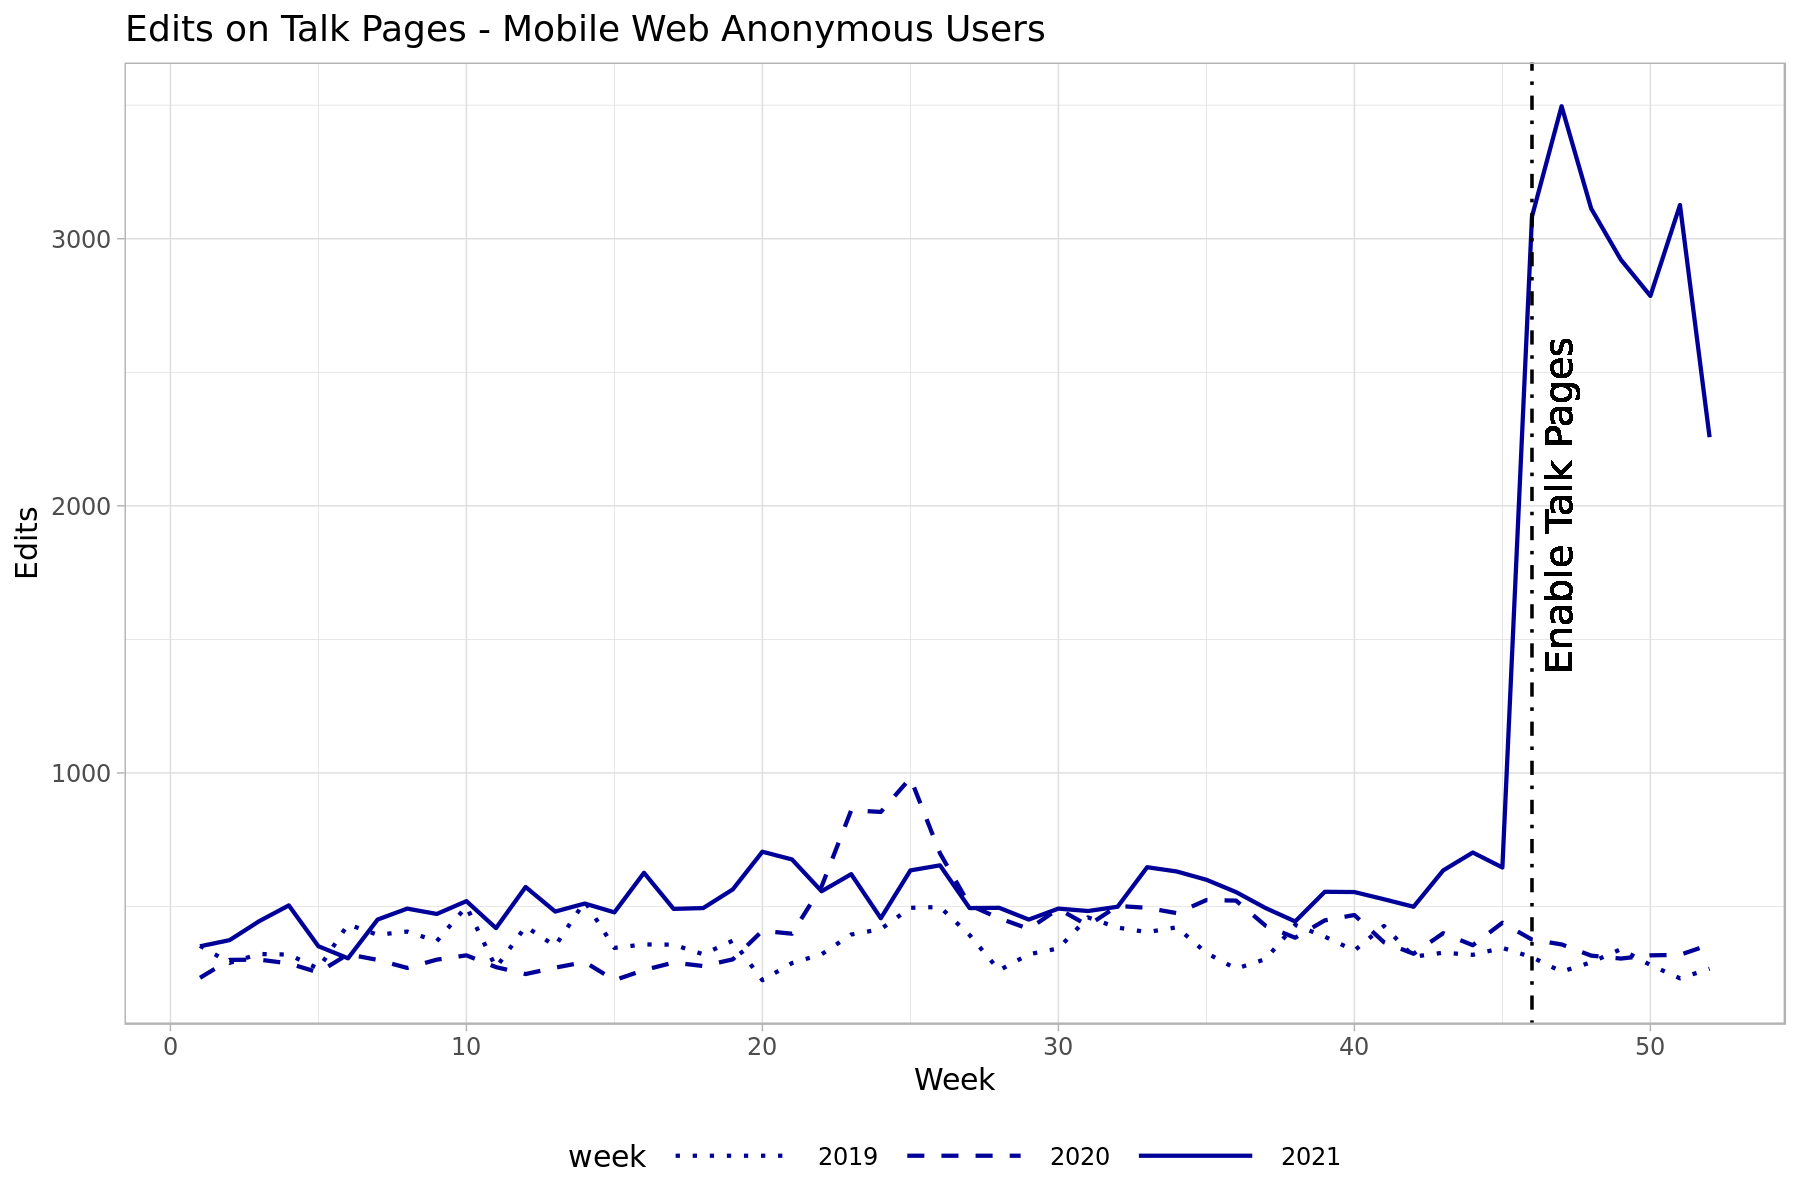

In [138]:
g_edit <- ggplot(data=filter( df,  (event_user_is_anonymous=='true')&(week_n<53)), 
                                mapping=aes(x=week_n, y=edits, linetype=year_n)) +
    geom_line(size=1.2,  color="#000099") +
    scale_linetype_manual(values=c('dotted', 'dashed' , 'solid'), name = "week") +
    geom_vline(xintercept = 46,  
                color = "black", linetype='dotdash', size=1) +
    geom_text(mapping = aes(x=46, label="Enable Talk Pages", y=2000),
                          size = 8,
                          angle=90,
                          vjust=1.5 ) +
    labs(title = 'Edits on Talk Pages - Mobile Web Anonymous Users',
     x = 'Week',
     y = 'Edits'
    ) + 
    theme_light(base_size=18) +
    theme(legend.position = "bottom", legend.key.width=unit(3,'cm'))
g_edit   



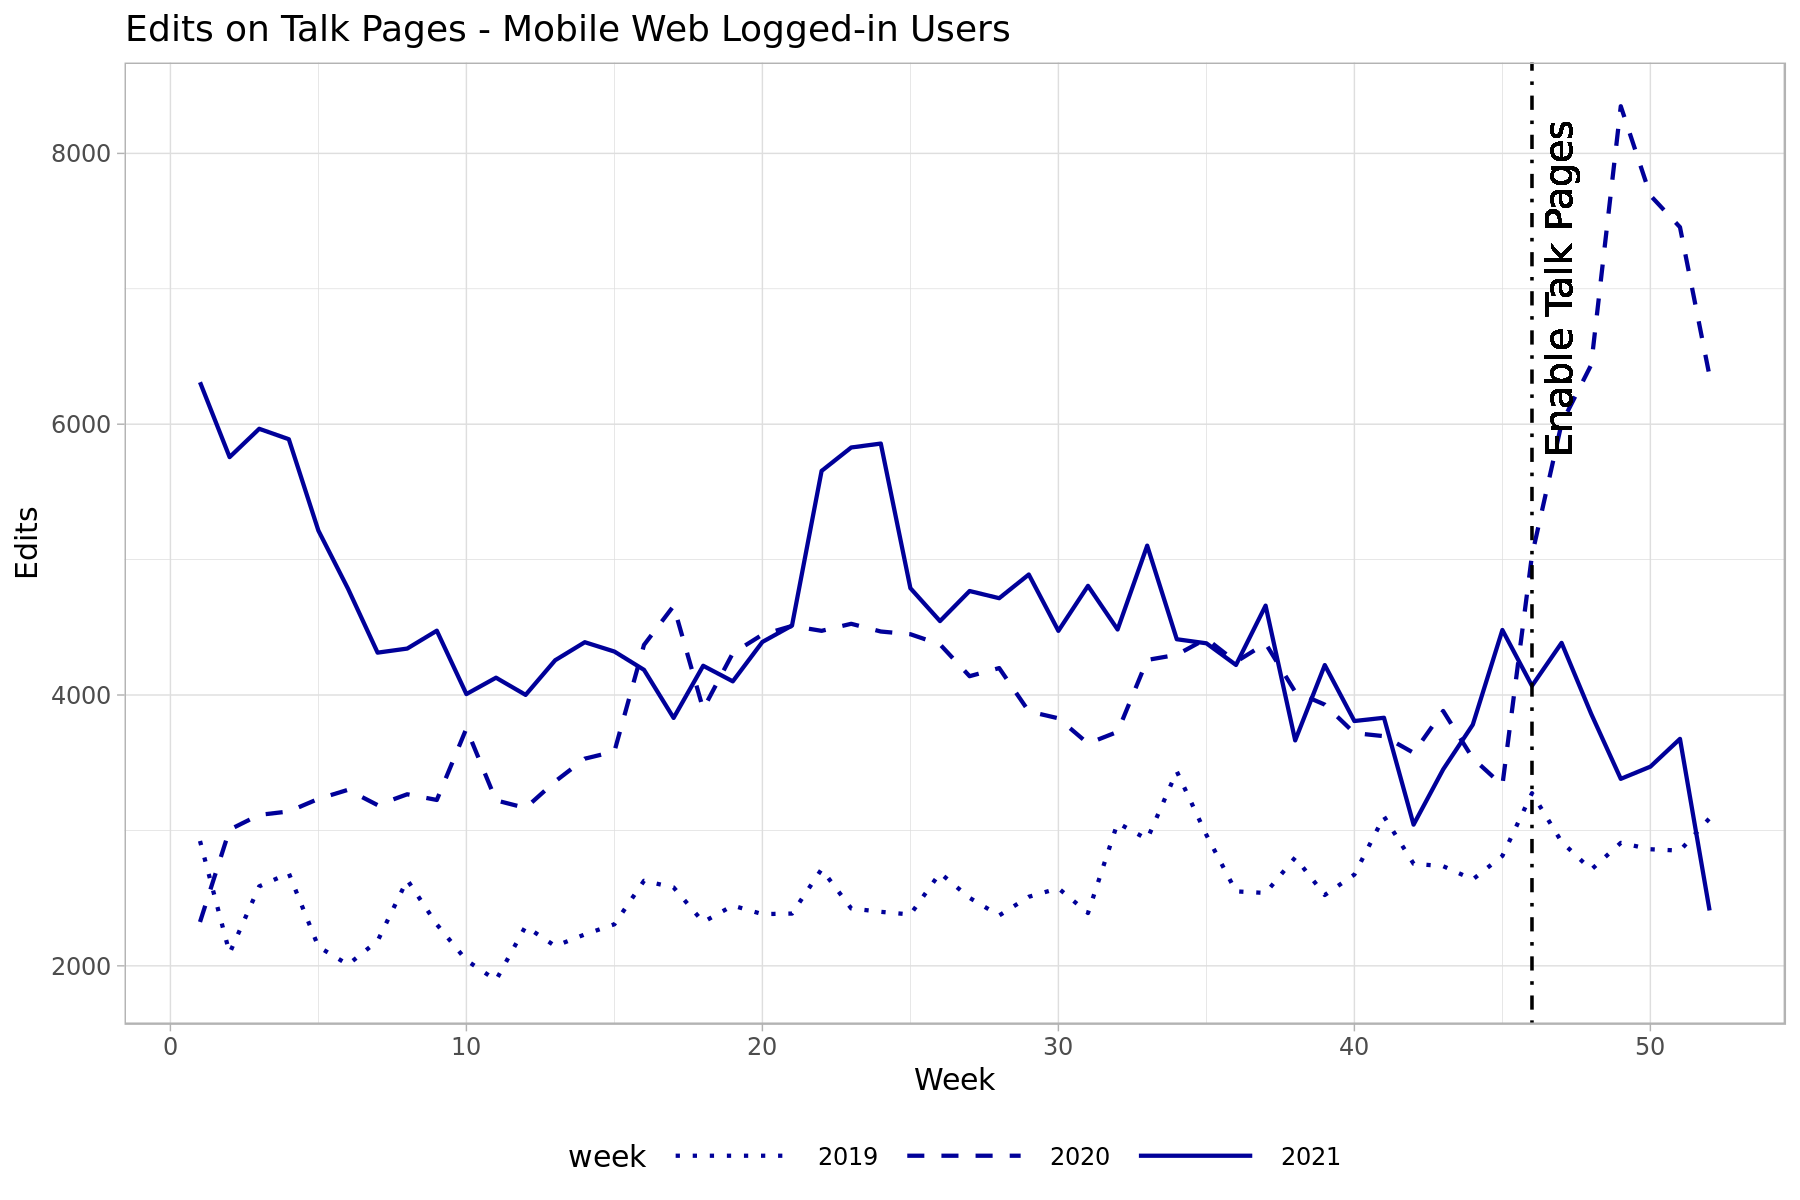

In [140]:
g_edit_0 <- ggplot(data=filter( df,  (event_user_is_anonymous=='false')&(week_n<53)), 
                                mapping=aes(x=week_n, y=edits, linetype=year_n)) +
    geom_line(size=1.2,  color="#000099") +
    scale_linetype_manual(values=c('dotted', 'dashed' , 'solid'), name = "week") +
    geom_vline(xintercept = 46,  
                color = "black", linetype='dotdash', size=1) +
    geom_text(mapping = aes(x=46, label="Enable Talk Pages", y=7000),
                          size = 8,
                          angle=90,
                          vjust=1.5 ) +
    labs(title = 'Edits on Talk Pages - Mobile Web Logged-in Users',
     x = 'Week',
     y = 'Edits'
    ) + 
    theme_light(base_size=18) +
    theme(legend.position = "bottom", legend.key.width=unit(3,'cm'))

g_edit_0 

In [141]:
g_revert <- ggplot(data=filter( df,  (event_user_is_anonymous=='true')&(week_n<53)), 
                                mapping=aes(x=week_n, y=revert_rate, linetype=year_n)) +
    geom_line(size=1.2,  color="#000099") +
    scale_linetype_manual(values=c('dotted', 'dashed' , 'solid'), name = "week") +
    geom_vline(xintercept = 46,  
                color = "black", linetype='dotdash', size=1) +
    geom_text(mapping = aes(x=46, label="Enable Talk Pages", y=46),
                          size = 5,
                          angle=90,
                          vjust=1.5 ) +
    labs(title = 'Revert Rate on Talk Pages - Mobile Web Anonymous Users',
     x = 'Week',
     y = 'Revert Rate',
    caption = "*     Revert rate: number of edits which were reverted within 48 hrs 
                 out of total edits on talk pages from mobile web anonymous users  
                 (in percentage %)"
    ) + 
    theme_light(base_size=18) +
    theme(legend.position = "bottom", legend.key.width=unit(3,'cm'))

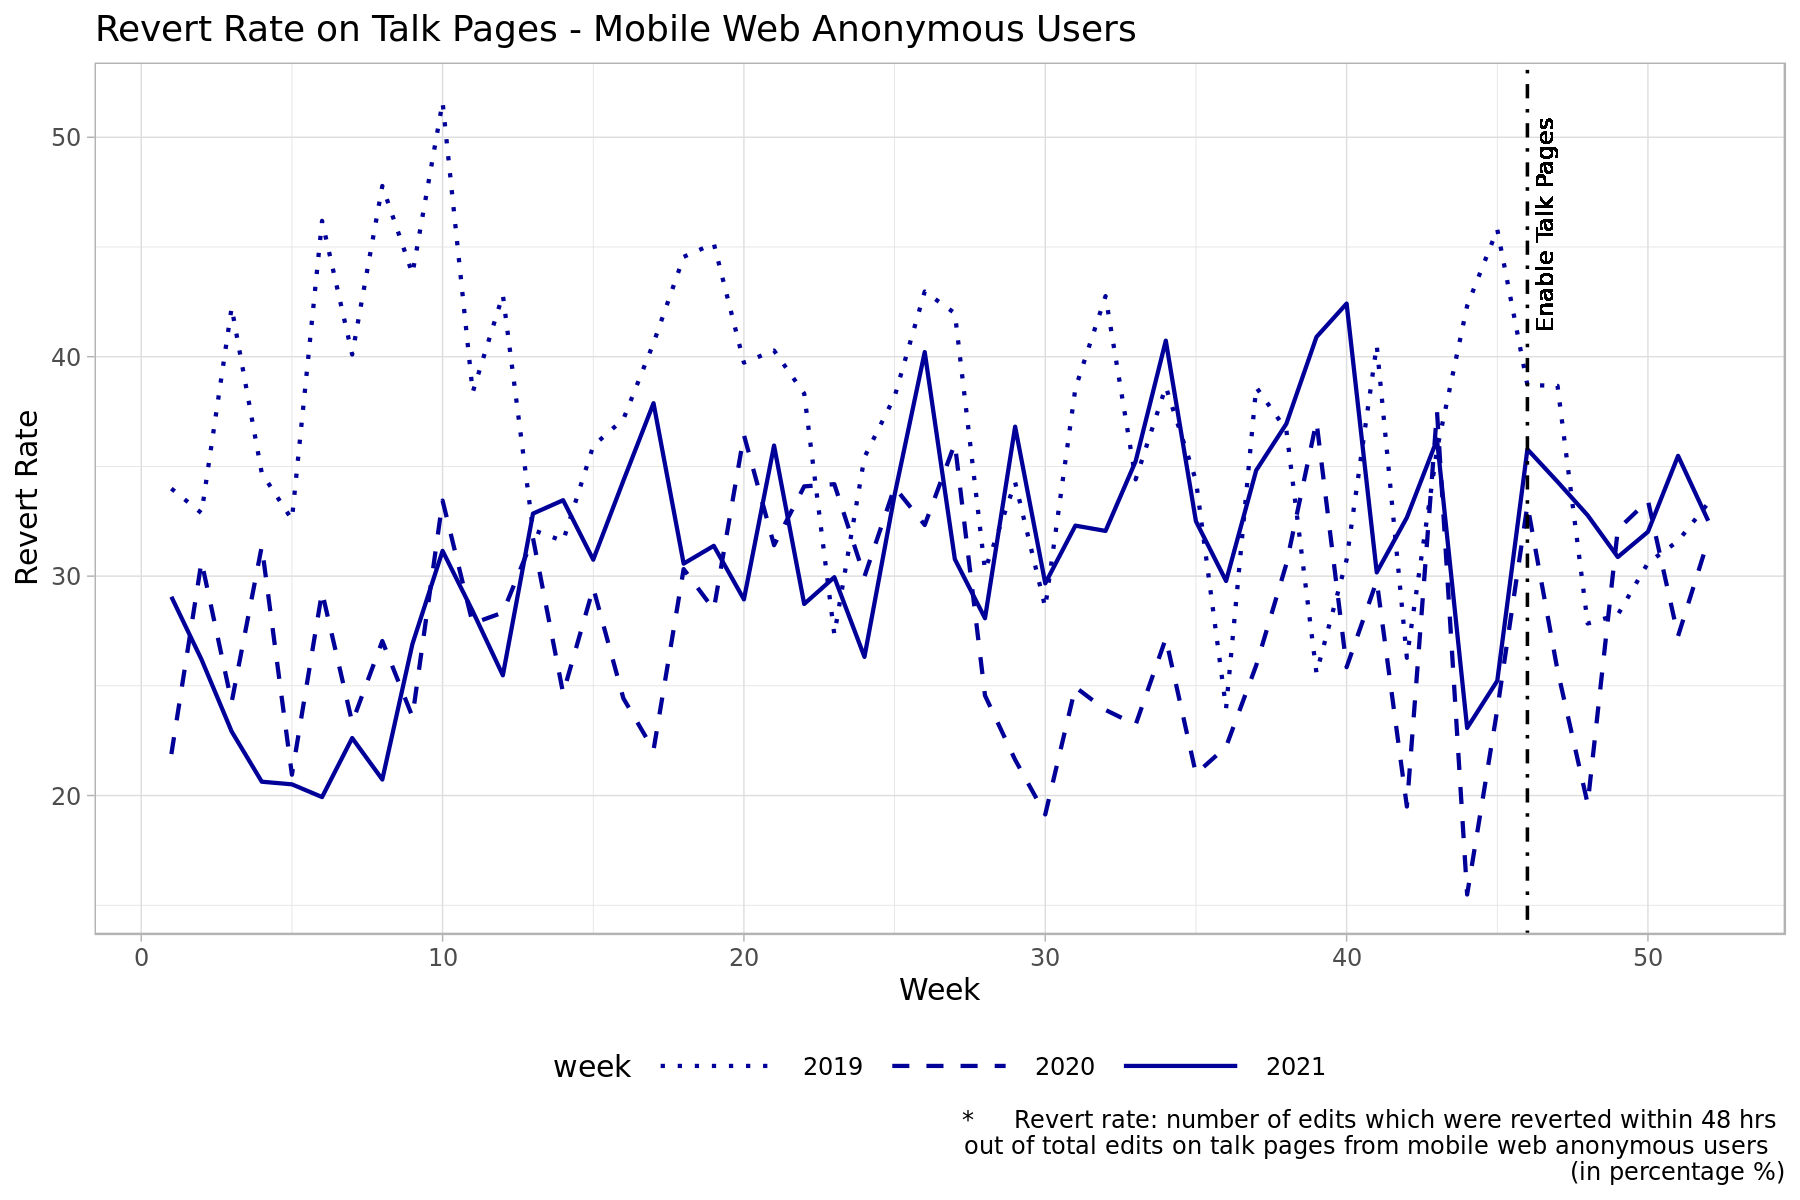

In [142]:
g_revert

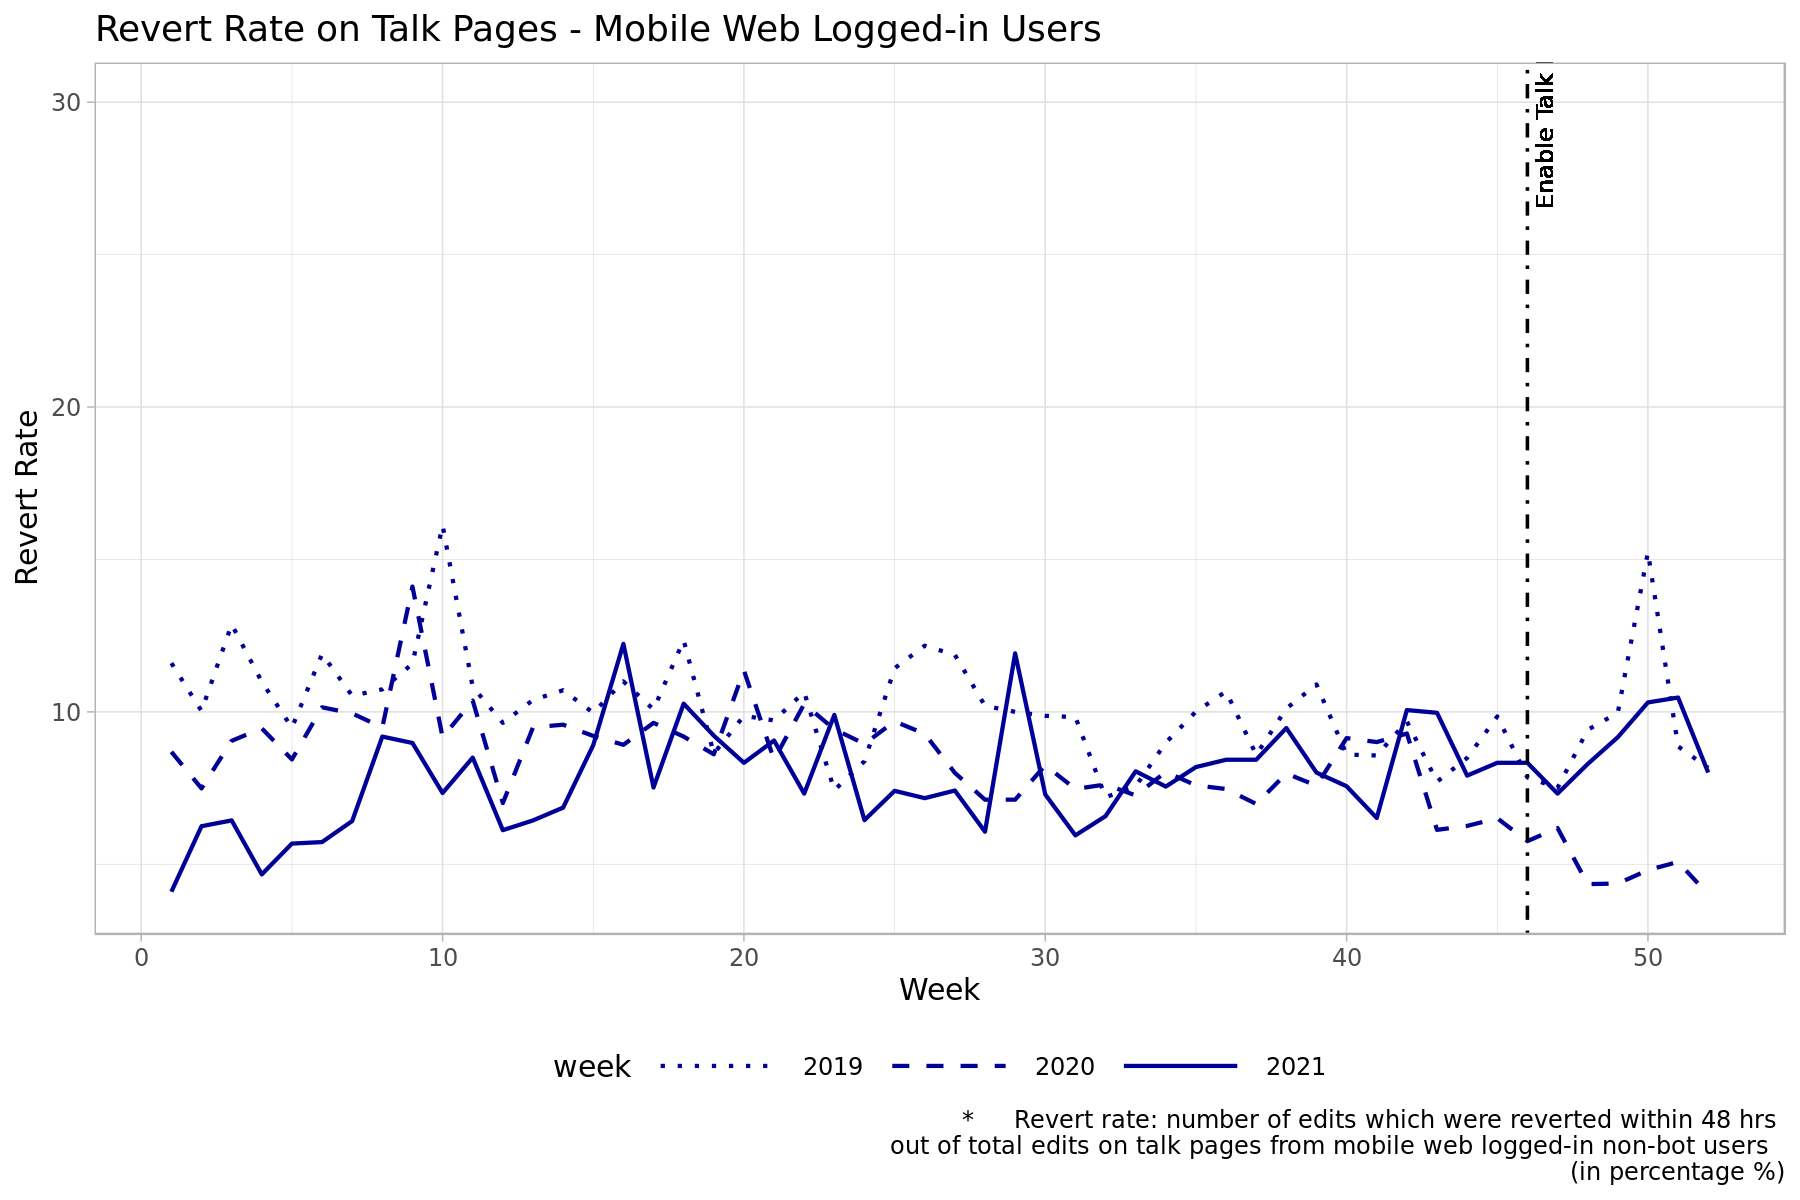

In [143]:
g_revert_0 <- ggplot(data=filter( df,  (event_user_is_anonymous=='false')&(week_n<53)), 
                                mapping=aes(x=week_n, y=revert_rate, linetype=year_n)) +
    geom_line(size=1.2,  color="#000099") +
    scale_linetype_manual(values=c('dotted', 'dashed' , 'solid'), name = "week") +
    geom_vline(xintercept = 46,  
                color = "black", linetype='dotdash', size=1) +
    geom_text(mapping = aes(x=46, label="Enable Talk Pages", y=30),
                          size = 5,
                          angle=90,
                          vjust=1.5 ) +
    labs(title = 'Revert Rate on Talk Pages - Mobile Web Logged-in Users',
     x = 'Week',
     y = 'Revert Rate',
    caption = "*     Revert rate: number of edits which were reverted within 48 hrs 
    out of total edits on talk pages from mobile web logged-in non-bot users  
    (in percentage %)"
    ) + 
    theme_light(base_size=18) +
    theme(legend.position = "bottom", legend.key.width=unit(3,'cm'))
g_revert_0   

In [144]:
df

year_n,week_n,event_user_is_anonymous,edits,reverted_edits,non_reverted_edits,revert_rate
<fct>,<int>,<chr>,<int>,<int>,<int>,<dbl>
2019,1,false,2922,339,2583,11.60
2019,1,true,353,120,233,33.99
2019,2,true,289,95,194,32.87
2019,2,false,2094,210,1884,10.03
2019,3,false,2587,333,2254,12.87
2019,3,true,322,136,186,42.24
2019,4,true,320,111,209,34.69
2019,4,false,2684,295,2389,10.99
2019,5,true,267,87,180,32.58


In [145]:
ggsave("Graphs/revert_rate.png",
    plot = g_revert , width = 60, height = 30, units = "cm", dpi = "screen")

In [146]:
 df_2 <- df_edits %>%
   inner_join(df_reverted_edits) %>%
   group_by( year_n, week_n) %>%
   summarize(edits = sum(edits), reverted_edits=sum(reverted_edits), .groups = 'drop')

Joining, by = c("year_n", "week_n", "event_user_is_anonymous")



In [147]:
df_2$year_n <- as.factor(df_2$year_n)

In [148]:
df_2 <- df_2 %>%
  mutate(
        revert_rate = round(reverted_edits/edits * 100 , 2)
        )

In [151]:
df_2

year_n,week_n,edits,reverted_edits,revert_rate
<fct>,<int>,<int>,<int>,<dbl>
2019,1,3275,459,14.02
2019,2,2383,305,12.80
2019,3,2909,469,16.12
2019,4,3004,406,13.52
2019,5,2408,290,12.04
2019,6,2442,439,17.98
2019,7,2578,388,15.05
2019,8,3041,477,15.69
2019,9,2676,429,16.03


In [152]:

write.csv(df_2, 'revert_rate_talk_mobileweb.csv')

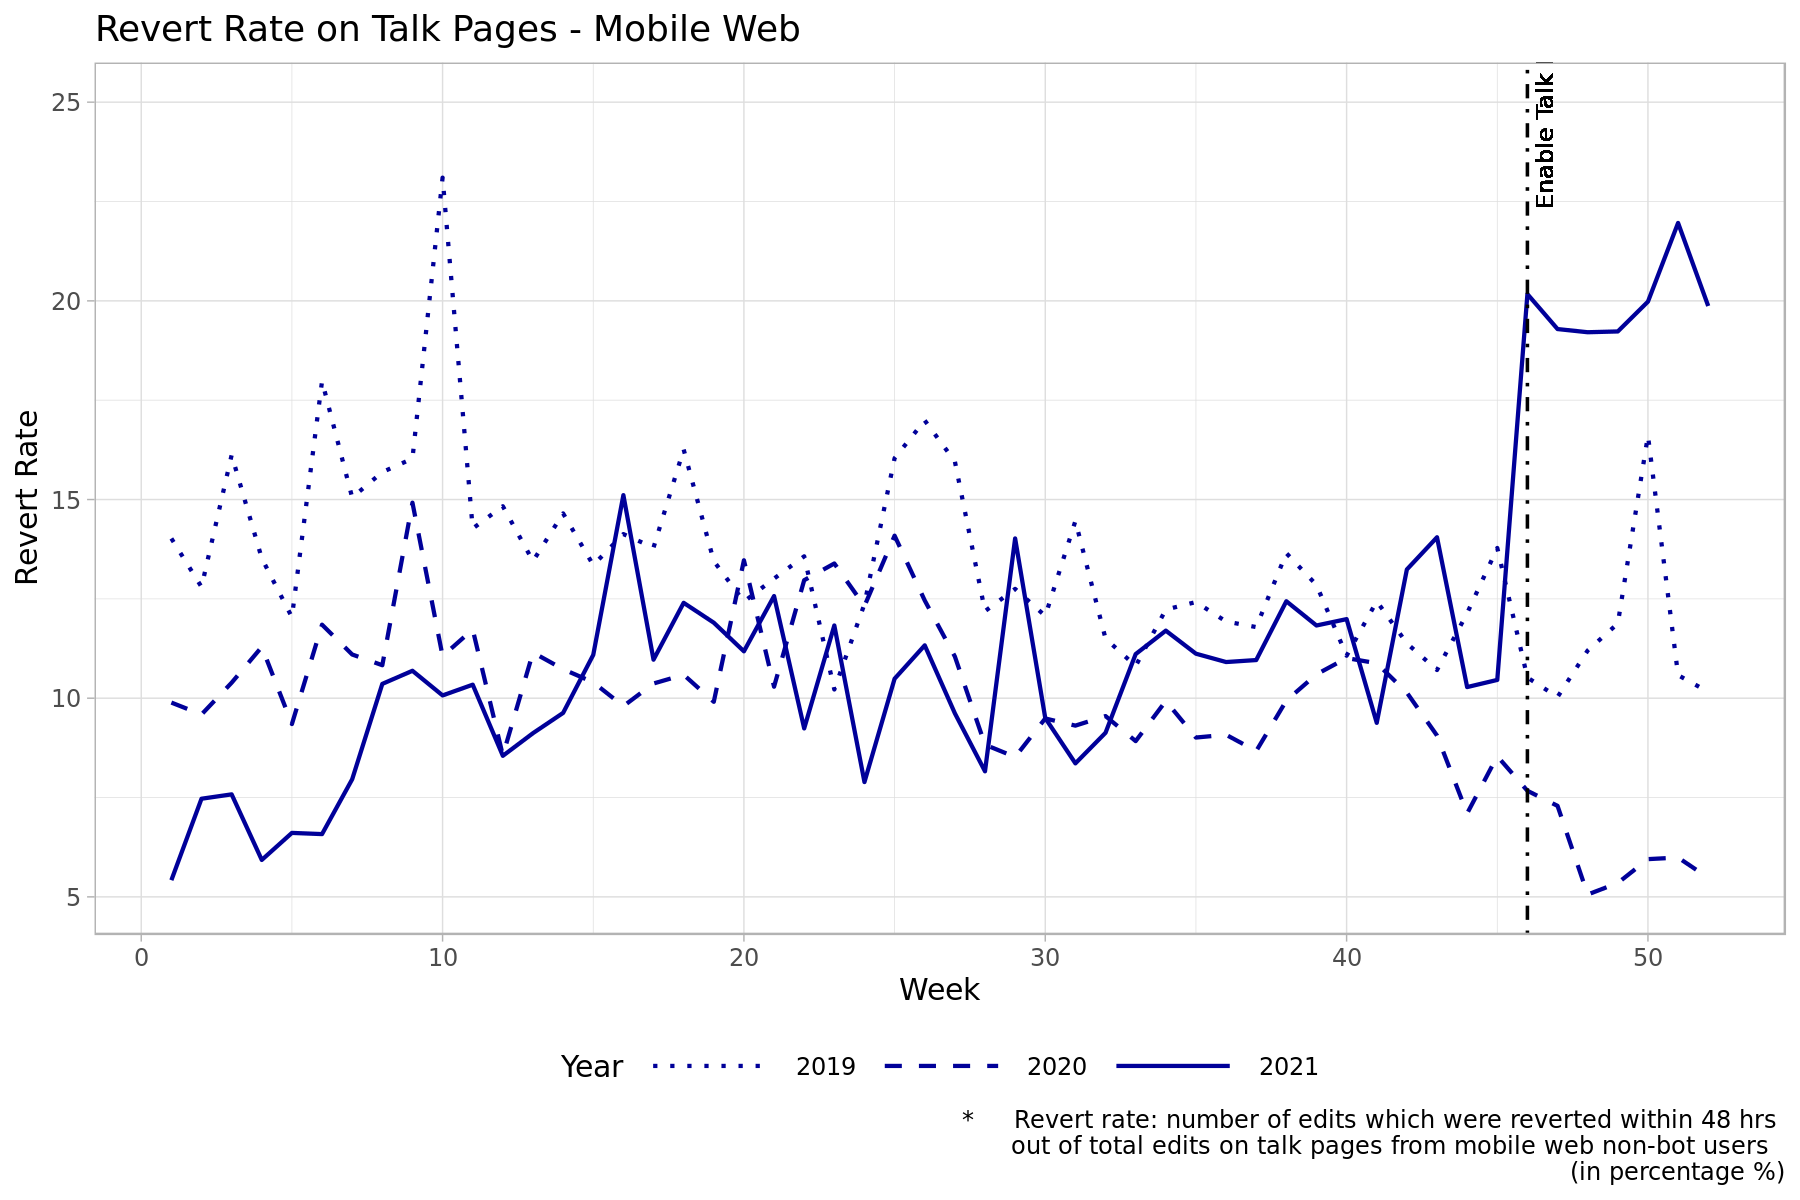

In [150]:
g_revert_2 <- ggplot(data=filter( df_2,  (week_n<53)), 
                                mapping=aes(x=week_n, y=revert_rate, linetype=year_n)) +
    geom_line(size=1.2,  color="#000099") +
    scale_linetype_manual(values=c('dotted', 'dashed' , 'solid'), name = "Year") +
    geom_vline(xintercept = 46,  
                color = "black", linetype='dotdash', size=1) +
    geom_text(mapping = aes(x=46, label="Enable Talk Pages", y=25),
                          size = 5,
                          angle=90,
                          vjust=1.5 ) +
    labs(title = 'Revert Rate on Talk Pages - Mobile Web',
     x = 'Week',
     y = 'Revert Rate',
    caption = "*     Revert rate: number of edits which were reverted within 48 hrs 
    out of total edits on talk pages from mobile web non-bot users  
    (in percentage %)"
    ) + 
    theme_light(base_size=18) +
    theme(legend.position = "bottom", legend.key.width=unit(3,'cm'))
g_revert_2 


# Metric: Number of blocked anonymous editors (across all IPs), separate by individual blocks and range blocks

Hypothesis: This change will improve the communication between anonymous and logged-in editors  


# Metric: Bounce rate
Definition:  1-( # of sessions which have clicked at last once on any links on talk page / # of  sessions which have initiated talk tab)  
Hypothesis: Readers will not understand what the talk page is and how to interact with it.

In [35]:
query_clicks <- 
"
WITH t1 AS (
SELECT   MIN(TO_DATE(dt)) AS init_date,
event.token AS session_id
FROM event.mobilewebuiactionstracking AS t_i
WHERE  t_i.year=2021
AND t_i.event.action='init' AND t_i.event.name IN ('ns=1', 'ns=3', 'ns=5','ns=7','ns=9',
'ns=11','ns=13','ns=15')
AND t_i.wiki='enwiki' and t_i.event.isanon=true
GROUP BY event.token
),
t2 AS (SELECT TO_DATE(dt) AS click_date, 
event.token AS session_id
FROM event.mobilewebuiactionstracking AS t_c
WHERE t_c.year=2021 
AND  t_c.event.action='click' 
AND t_c.wiki='enwiki' and t_c.event.isanon=true
)
SELECT  init_date, COUNT(DISTINCT t1.session_id) AS initiated_sessions, 
COUNT(DISTINCT t2.session_id) AS clicked_sessions
FROM t1 LEFT JOIN t2 
ON t1.session_id=t2.session_id
GROUP BY init_date
"

In [36]:
df_clicks <- wmfdata::query_hive(query_clicks)

Don't forget to authenticate with Kerberos using kinit



In [37]:
df_clicks

init_date,initiated_sessions,clicked_sessions
<chr>,<int>,<int>
2021-11-16,1527,662
2021-11-17,1780,762
2021-11-18,1749,728
2021-11-19,1924,833
2021-11-20,1895,753
2021-11-21,1963,760
2021-11-22,1931,801
2021-11-23,1923,772
2021-11-24,1848,715


In [38]:
df_clicks

init_date,initiated_sessions,clicked_sessions
<chr>,<int>,<int>
2021-11-16,1527,662
2021-11-17,1780,762
2021-11-18,1749,728
2021-11-19,1924,833
2021-11-20,1895,753
2021-11-21,1963,760
2021-11-22,1931,801
2021-11-23,1923,772
2021-11-24,1848,715


In [39]:
df_clicks <- df_clicks %>%
  mutate(
        bounce_rate = round((1-clicked_sessions/initiated_sessions) * 100 , 2)
        )

In [40]:

df_clicks$init_date <- as.Date(df_clicks$init_date)

In [153]:
df_clicks

init_date,initiated_sessions,clicked_sessions,bounce_rate
<date>,<int>,<int>,<dbl>
2021-11-16,1527,662,56.65
2021-11-17,1780,762,57.19
2021-11-18,1749,728,58.38
2021-11-19,1924,833,56.70
2021-11-20,1895,753,60.26
2021-11-21,1963,760,61.28
2021-11-22,1931,801,58.52
2021-11-23,1923,772,59.85
2021-11-24,1848,715,61.31


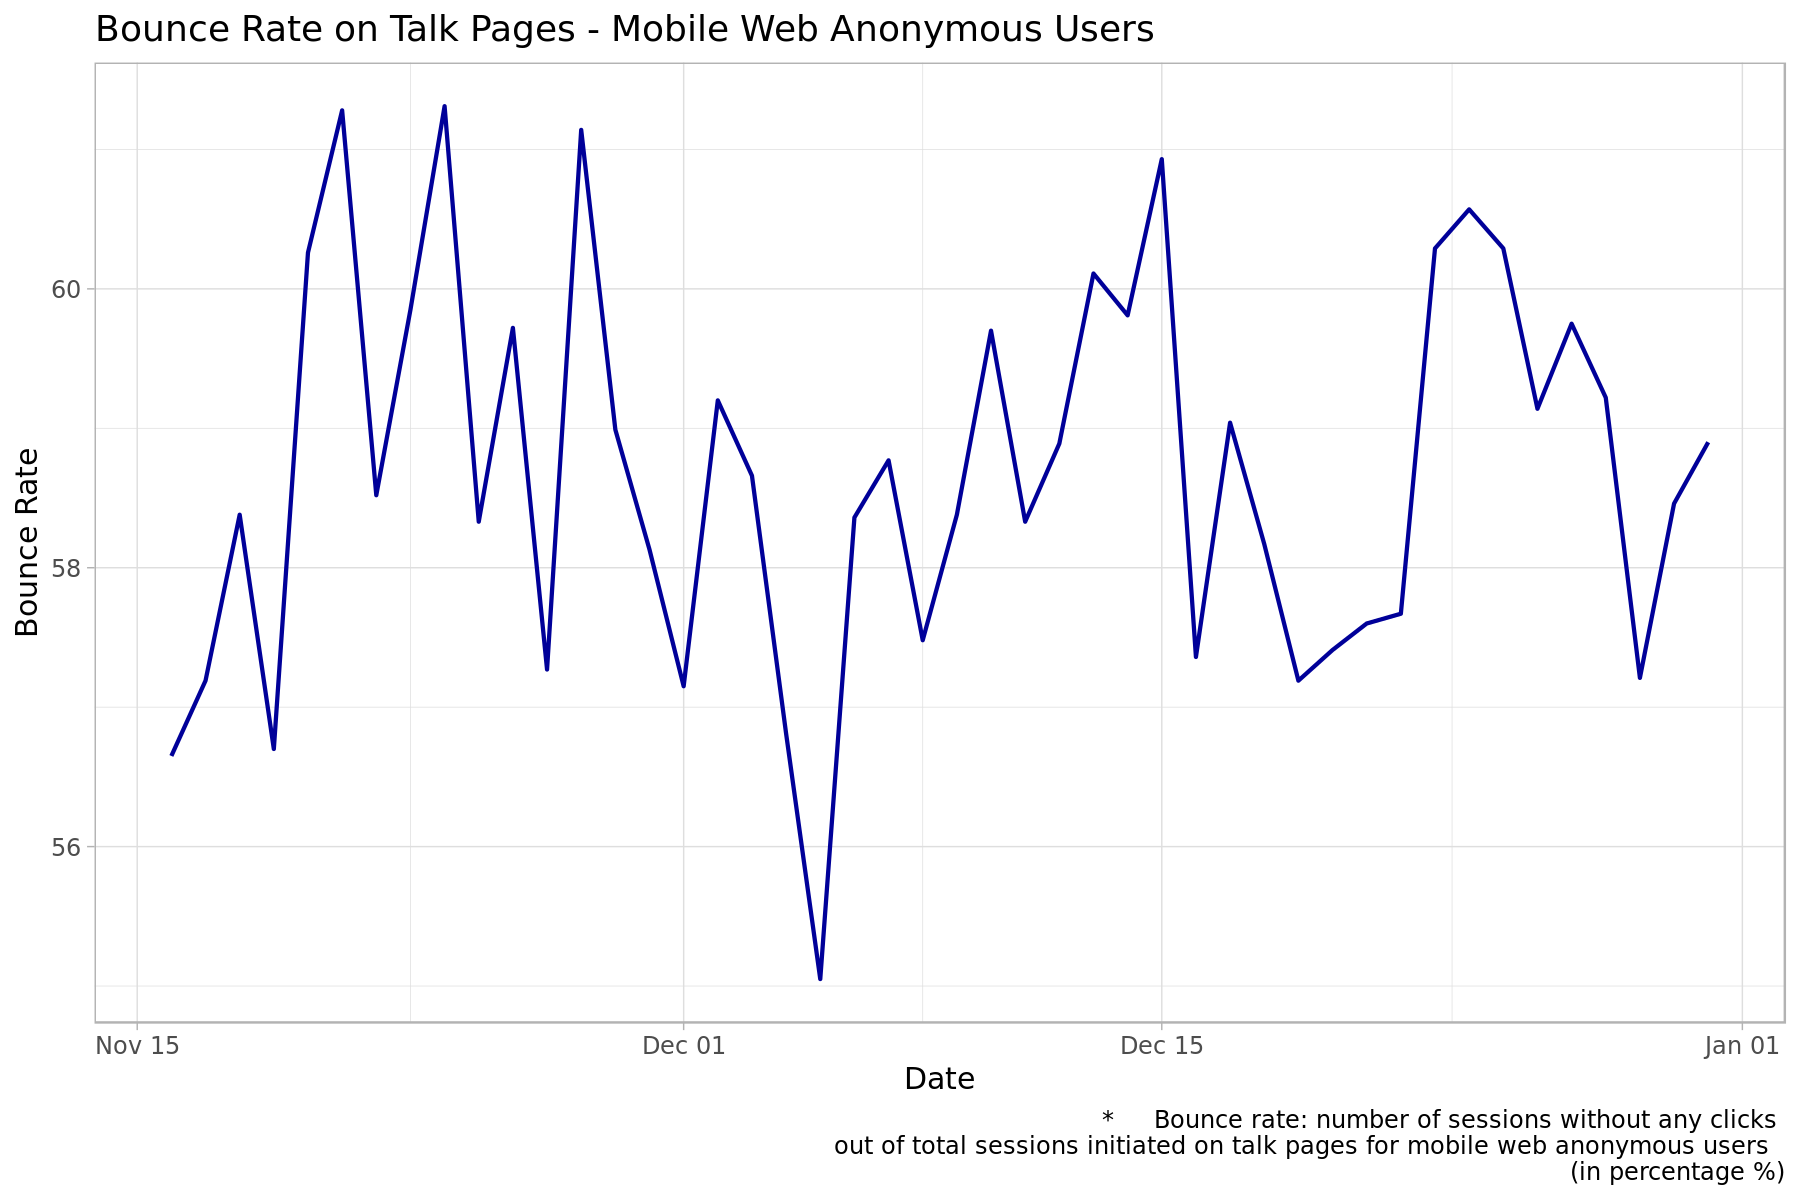

In [42]:
g_bounce <- ggplot(data= df_clicks, 
                                mapping=aes(x=init_date, y=bounce_rate)) +
    geom_line(size=1.2,  color="#000099") +
    labs(title = 'Bounce Rate on Talk Pages - Mobile Web Anonymous Users',
     x = 'Date',
     y = 'Bounce Rate',
    caption = "*     Bounce rate: number of sessions without any clicks 
                     out of total sessions initiated on talk pages for mobile web anonymous users  
                     (in percentage %)"
    ) + 
    theme_light(base_size=18) +
    theme(legend.position = "bottom", legend.key.width=unit(3,'cm'))
g_bounce

In [26]:
query_clicks_2 <- 
"
WITH t1 AS (
SELECT   MIN(TO_DATE(dt)) AS init_date,
event.token AS session_id, t_i.event.isanon AS is_anon
FROM event.mobilewebuiactionstracking AS t_i
WHERE  t_i.year=2021
AND t_i.event.action='init' AND t_i.event.name IN ('ns=1', 'ns=3', 'ns=5','ns=7','ns=9',
'ns=11','ns=13','ns=15')
AND t_i.wiki='enwiki'
GROUP BY event.token, t_i.event.isanon
),
t2 AS (SELECT TO_DATE(dt) AS click_date, 
event.token AS session_id, t_c.event.isanon AS is_anon
FROM event.mobilewebuiactionstracking AS t_c
WHERE t_c.year=2021 
AND  t_c.event.action='click' 
AND t_c.wiki='enwiki'
)
SELECT  init_date, t1.is_anon, COUNT(DISTINCT t1.session_id) AS initiated_sessions, 
COUNT(DISTINCT t2.session_id) AS clicked_sessions
FROM t1 LEFT JOIN t2 
ON t1.session_id=t2.session_id AND t1.is_anon = t2.is_anon
GROUP BY init_date, t1.is_anon
"

In [27]:
df_clicks_2 <- wmfdata::query_hive(query_clicks_2)

Don't forget to authenticate with Kerberos using kinit



In [29]:
df_clicks_2 <- df_clicks_2 %>%
  mutate(
        bounce_rate = round((1-clicked_sessions/initiated_sessions) * 100 , 2)
        )

In [30]:
df_clicks_2

init_date,is_anon,initiated_sessions,clicked_sessions,bounce_rate
<chr>,<chr>,<int>,<int>,<dbl>
2021-11-16,false,65,45,30.77
2021-11-16,true,1527,662,56.65
2021-11-17,false,57,35,38.60
2021-11-17,true,1780,762,57.19
2021-11-18,false,51,28,45.10
2021-11-18,true,1749,728,58.38
2021-11-19,false,63,41,34.92
2021-11-19,true,1924,833,56.70
2021-11-20,false,63,36,42.86


In [32]:
 df_bounce_2 <- df_clicks_2 %>%
   group_by( init_date) %>%
   summarize(initiated_sessions = sum(initiated_sessions), clicked_sessions=sum(clicked_sessions), .groups = 'drop')

In [33]:
df_bounce_2 <- df_bounce_2 %>%
  mutate(
        bounce_rate = round((1-clicked_sessions/initiated_sessions) * 100 , 2)
        )

In [34]:
df_bounce_2

init_date,initiated_sessions,clicked_sessions,bounce_rate
<chr>,<int>,<int>,<dbl>
2021-11-16,1592,707,55.59
2021-11-17,1837,797,56.61
2021-11-18,1800,756,58.00
2021-11-19,1987,874,56.01
2021-11-20,1958,789,59.70
2021-11-21,2026,803,60.37
2021-11-22,1997,840,57.94
2021-11-23,2014,835,58.54
2021-11-24,1915,753,60.68


In [44]:
df_bounce_2$init_date <- as.Date(df_bounce_2$init_date)

In [155]:
write.csv(df_bounce_2, 'bounce_rate_talk_mobileweb.csv')

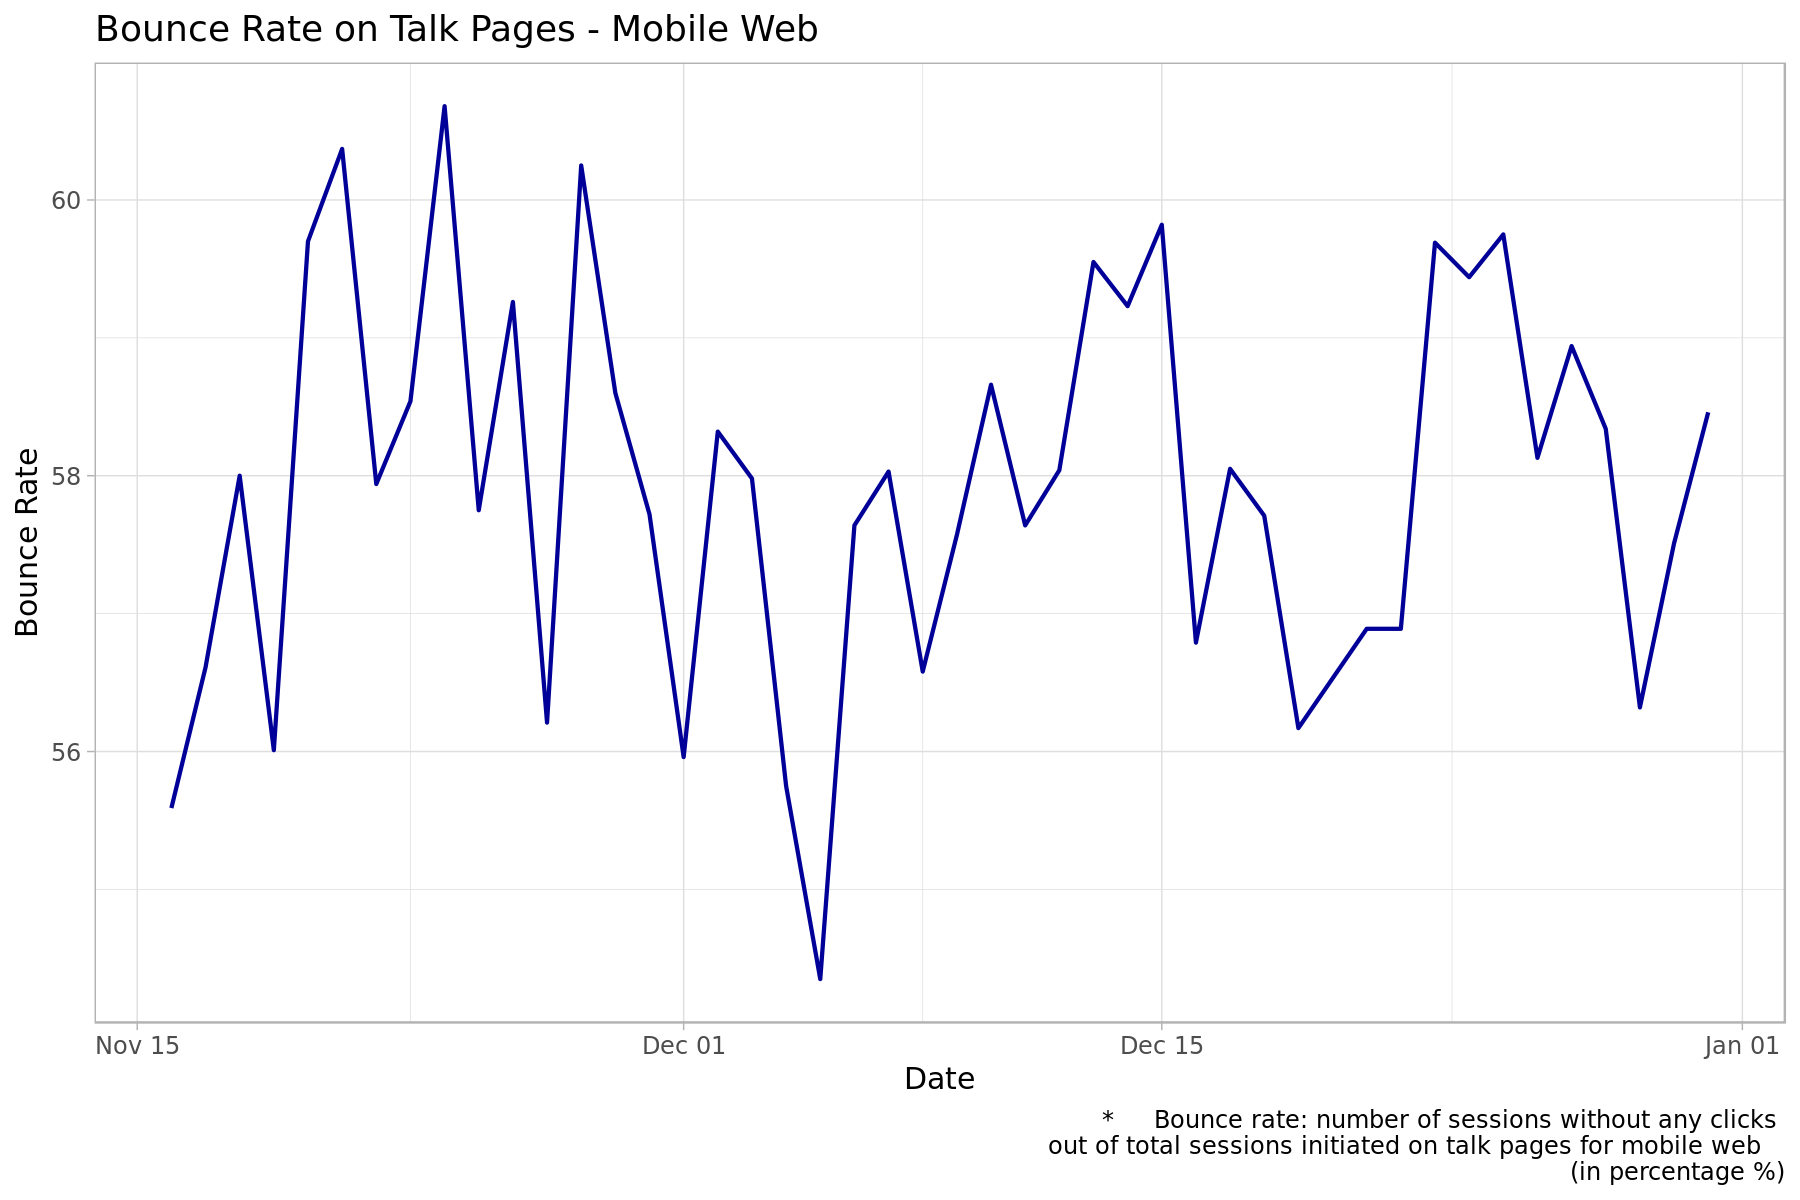

In [45]:
g_bounce <- ggplot(data= df_bounce_2, 
                                mapping=aes(x=init_date, y=bounce_rate)) +
    geom_line(size=1.2,  color="#000099") +
    labs(title = 'Bounce Rate on Talk Pages - Mobile Web',
     x = 'Date',
     y = 'Bounce Rate',
    caption = "*     Bounce rate: number of sessions without any clicks 
                     out of total sessions initiated on talk pages for mobile web   
                     (in percentage %)"
    ) + 
    theme_light(base_size=18) +
    theme(legend.position = "bottom", legend.key.width=unit(3,'cm'))
g_bounce

In [46]:
min(df_bounce_2$bounce_rate)

[1] 54.35

In [47]:
max(df_bounce_2$bounce_rate)

[1] 60.68

In [48]:
mean(df_bounce_2$bounce_rate)

[1] 57.91217

Average bounce rate of logged-in User

In [55]:

 mean(filter(df_clicks_2, is_anon=='false')$bounce_rate)

[1] 37.00065

# Metric: Time on page

Hypothesis: Readers will not understand what the talk page is and how to interact with it.  

# Metric: Pageviews on talk pages from mobile web 

In [82]:
query_pageviews <- "
   SELECT
        CONCAT(year,'-', LPAD(month,2,'0'),'-', LPAD(day,2,'0')) AS date_time,
        SUM(view_count) AS pageviews,
        SUM(IF(access_method = 'mobile app', view_count, null)) AS apps_pv,
        SUM(IF(access_method = 'desktop', view_count, null)) AS desktop_pv,
        SUM(IF(access_method = 'mobile web', view_count, null)) AS mobileweb_pv
    FROM wmf.pageview_hourly
    WHERE year = 2021 and month >= 10
      AND agent_type = 'user'
      AND project='en.wikipedia' AND namespace_id IN (1,3,5,7,9,11,13,15)
    GROUP BY CONCAT(year,'-', LPAD(month,2,'0'),'-', LPAD(day,2,'0'))
ORDER BY date_time
LIMIT 1000000
"

In [83]:
df_pageviews <- wmfdata::query_hive(query_pageviews)

Don't forget to authenticate with Kerberos using kinit



In [84]:
df_pageviews

date_time,pageviews,apps_pv,desktop_pv,mobileweb_pv
<chr>,<int>,<chr>,<int>,<int>
2021-10-01,258967,NULL,232011,26956
2021-10-02,230017,NULL,203995,26022
2021-10-03,219978,NULL,194030,25948
2021-10-04,242415,NULL,216829,25586
2021-10-05,239354,NULL,215792,23562
2021-10-06,235590,NULL,209024,26566
2021-10-07,233324,NULL,208865,24459
2021-10-08,244906,NULL,219705,25201
2021-10-09,217833,NULL,191660,26173


In [85]:
df_pageviews <- df_pageviews %>%
    mutate(mobileweb_rate = round(mobileweb_pv/pageviews*100,2))



In [86]:
df_pageviews$date_time <- as.Date(df_pageviews$date_time)

In [87]:
df_pageviews

date_time,pageviews,apps_pv,desktop_pv,mobileweb_pv,mobileweb_rate
<date>,<int>,<chr>,<int>,<int>,<dbl>
2021-10-01,258967,NULL,232011,26956,10.41
2021-10-02,230017,NULL,203995,26022,11.31
2021-10-03,219978,NULL,194030,25948,11.80
2021-10-04,242415,NULL,216829,25586,10.55
2021-10-05,239354,NULL,215792,23562,9.84
2021-10-06,235590,NULL,209024,26566,11.28
2021-10-07,233324,NULL,208865,24459,10.48
2021-10-08,244906,NULL,219705,25201,10.29
2021-10-09,217833,NULL,191660,26173,12.02


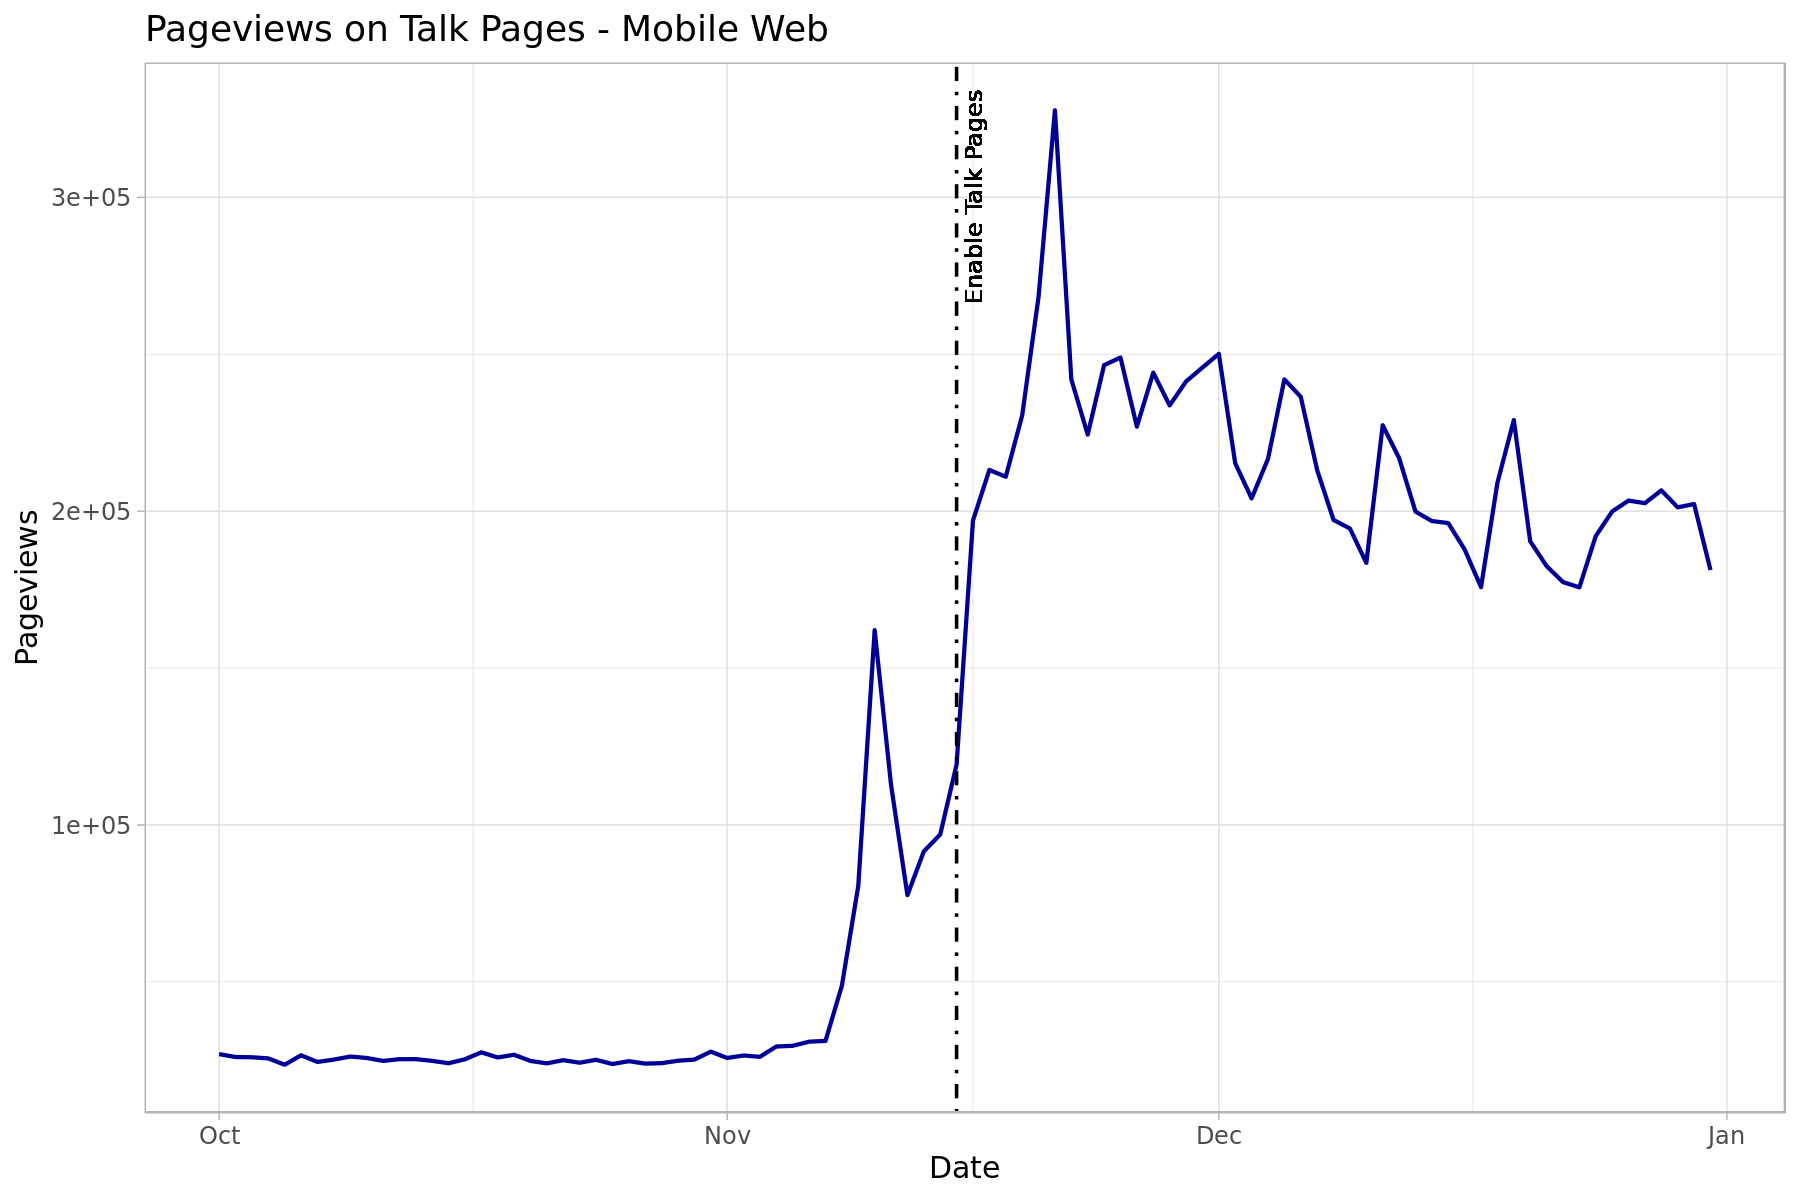

In [89]:
 g_pv <- ggplot(data=df_pageviews , 
                                mapping=aes(x=date_time, y=mobileweb_pv)) +
    geom_line(size=1.2,  color="#000099") +
    geom_vline(xintercept = as.Date('2021-11-15'),  
                color = "black", linetype='dotdash', size=1) +
    geom_text(mapping = aes(x=as.Date('2021-11-15'), label="Enable Talk Pages", y=300000),
                          size = 5,
                          angle=90,
                          vjust=1.5 ) +
    labs(title = 'Pageviews on Talk Pages - Mobile Web',
     x = 'Date',
     y = 'Pageviews'
    ) + 
    theme_light(base_size=18) 
g_pv 

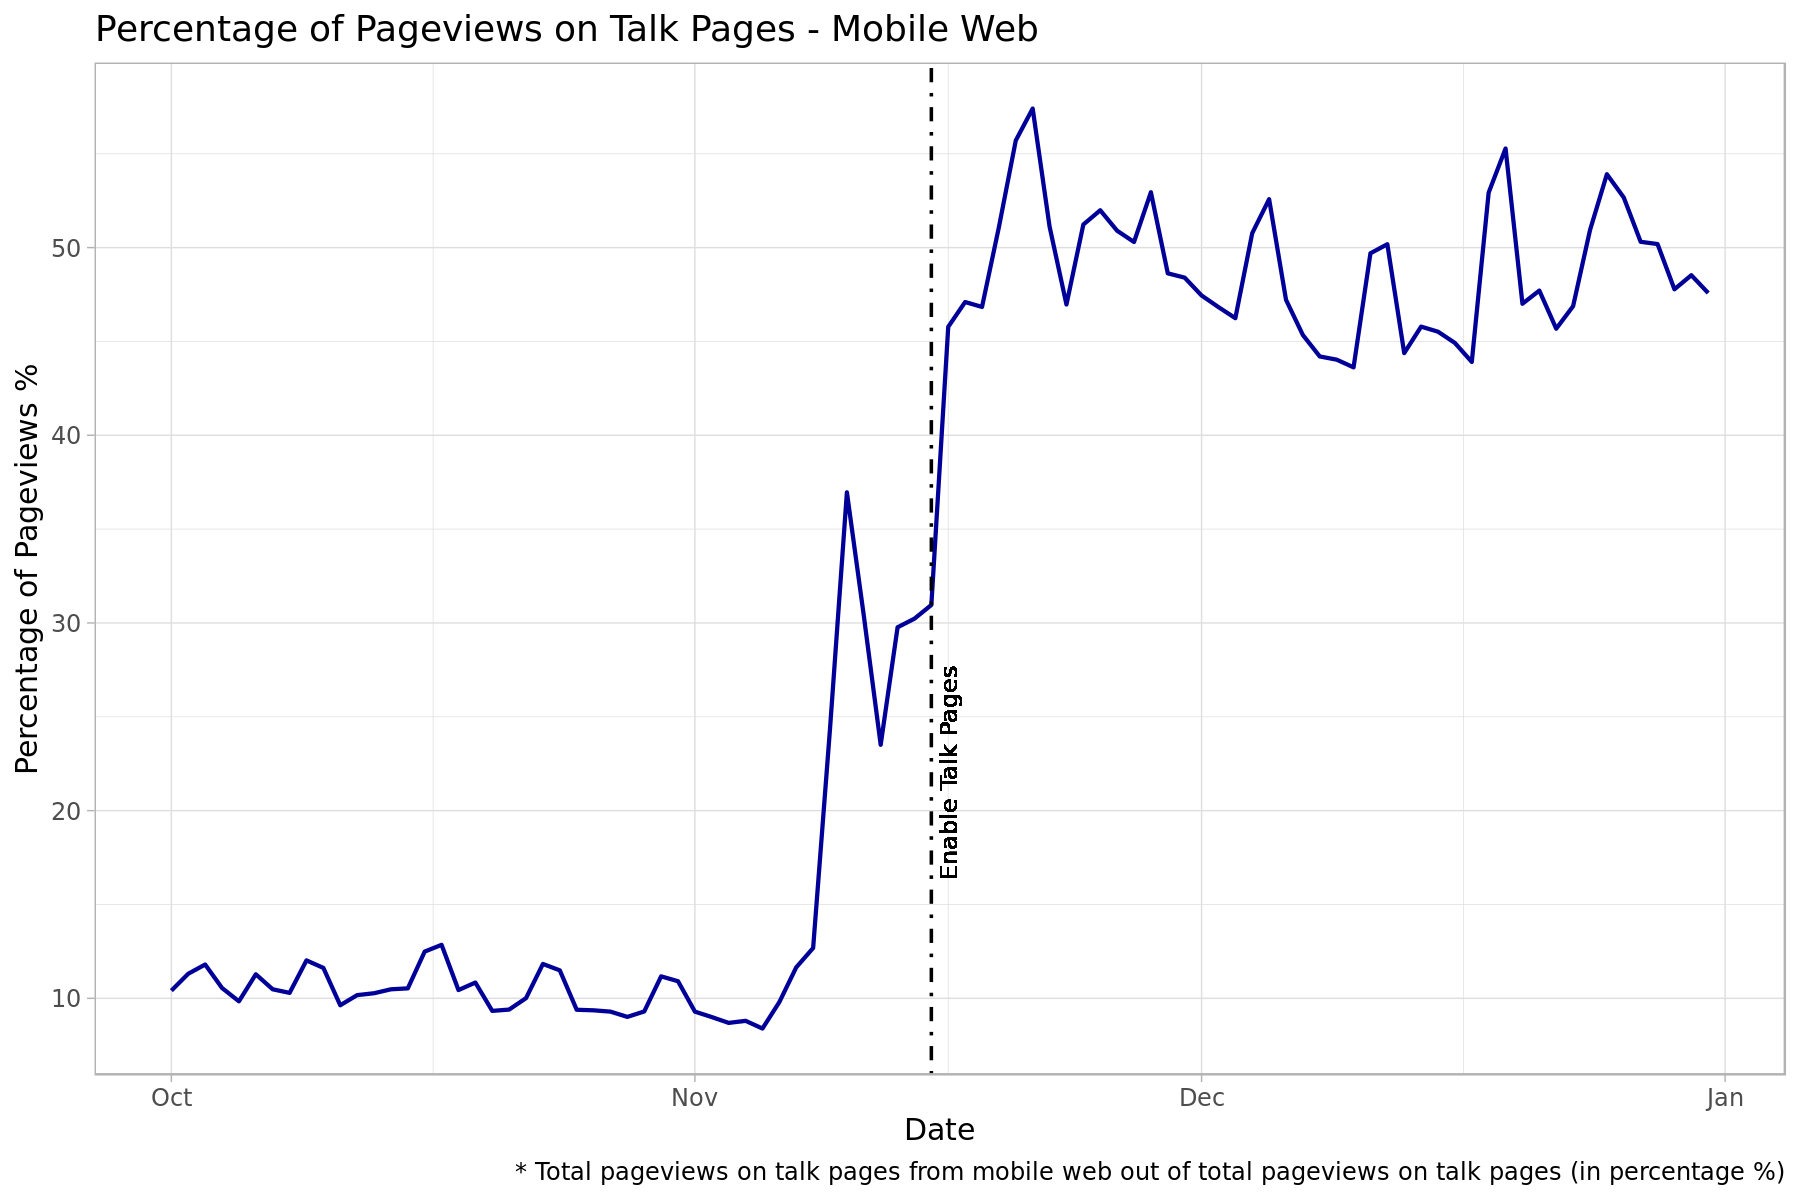

In [103]:
g_pv_rate <- ggplot(data=df_pageviews , 
                                mapping=aes(x=date_time, y=mobileweb_rate)) +
    geom_line(size=1.2,  color="#000099") +
    geom_vline(xintercept = as.Date('2021-11-15'),  
                color = "black", linetype='dotdash', size=1) +
    geom_text(mapping = aes(x=as.Date('2021-11-15'), label="Enable Talk Pages", y=22),
                          size = 5,
                          angle=90,
                          vjust=1.5 ) +
    labs(title = 'Percentage of Pageviews on Talk Pages - Mobile Web',
     x = 'Date',
     y = 'Percentage of Pageviews %',
    caption = "* Total pageviews on talk pages from mobile web out of total pageviews on talk pages (in percentage %)" 
    ) + 
    theme_light(base_size=18) 
g_pv_rate 

In [91]:
query_pageviews_2 <- "
 SELECT
        CONCAT(year,'-', LPAD(month,2,'0'),'-', LPAD(day,2,'0')) AS date_time,
        x_analytics_map['loggedIn'],
        COUNT(1) AS pageviews,
        SUM(IF(access_method = 'mobile app', 1, null)) AS apps_pv,
        SUM(IF(access_method = 'desktop', 1, null)) AS desktop_pv,
        SUM(IF(access_method = 'mobile web', 1, null)) AS mobileweb_pv
    FROM wmf.webrequest 
    WHERE year = 2021 and month >= 10
      and is_pageview and normalized_host.project_class = 'wikipedia' 
      and normalized_host.project = 'en' 
      AND agent_type = 'user'
      AND namespace_id IN (1,3,5,7,9,11,13,15)
    GROUP BY CONCAT(year,'-', LPAD(month,2,'0'),'-', LPAD(day,2,'0')),
    x_analytics_map['loggedIn']
"

In [65]:
df_pageviews_2 <- wmfdata::query_hive(query_pageviews_2)

Don't forget to authenticate with Kerberos using kinit

Warning message in system(cmd, intern = TRUE):
“running command 'export HADOOP_HEAPSIZE=1024 && ionice nice hive -S -f ./temp_query50467d884f86.hql 2>&1 > ./temp_results504676a09816.tsv' had status 155”


ERROR: Error in read.table(file = file, header = header, sep = sep, quote = quote, : no lines available in input


In [73]:
query_pageviews_3 <- "
 SELECT
        CONCAT(year,'-', LPAD(month,2,'0'),'-', LPAD(day,2,'0')) AS date_time,
        x_analytics_map['loggedIn'] AS loggedIn,
        COUNT(1) AS pageviews,
        SUM(IF(access_method = 'mobile app', 1, null)) AS apps_pv,
        SUM(IF(access_method = 'desktop', 1, null)) AS desktop_pv,
        SUM(IF(access_method = 'mobile web', 1, null)) AS mobileweb_pv
    FROM wmf.pageview_actor
    WHERE year = 2021 and month >= 10
      and is_pageview and normalized_host.project_class = 'wikipedia' 
      and normalized_host.project = 'en' 
      AND agent_type = 'user'
      AND namespace_id IN (1,3,5,7,9,11,13,15)
    GROUP BY CONCAT(year,'-', LPAD(month,2,'0'),'-', LPAD(day,2,'0')),
    x_analytics_map['loggedIn']
ORDER BY date_time, loggedIN
LIMIT 1000000
"



In [74]:
df_pageviews_3 <- wmfdata::query_hive(query_pageviews_3)

Don't forget to authenticate with Kerberos using kinit



In [75]:
df_pageviews_3 

date_time,loggedin,pageviews,apps_pv,desktop_pv,mobileweb_pv
<chr>,<chr>,<int>,<chr>,<int>,<int>
2021-10-22,NULL,176458,NULL,157457,19001
2021-10-22,1,73416,NULL,67395,6021
2021-10-23,NULL,138627,NULL,120312,18315
2021-10-23,1,66093,NULL,60195,5898
2021-10-24,NULL,152328,NULL,132899,19429
2021-10-24,1,66508,NULL,60801,5707
2021-10-25,NULL,175120,NULL,157141,17979
2021-10-25,1,78308,NULL,72499,5809
2021-10-26,NULL,183391,NULL,165115,18276


In [93]:
df_pageviews_3$date_time <- as.Date(df_pageviews_3$date_time)

In [156]:
write.csv(filter(df_pageviews_3,loggedin=='NULL' ), 'pageview_loggedout.csv')

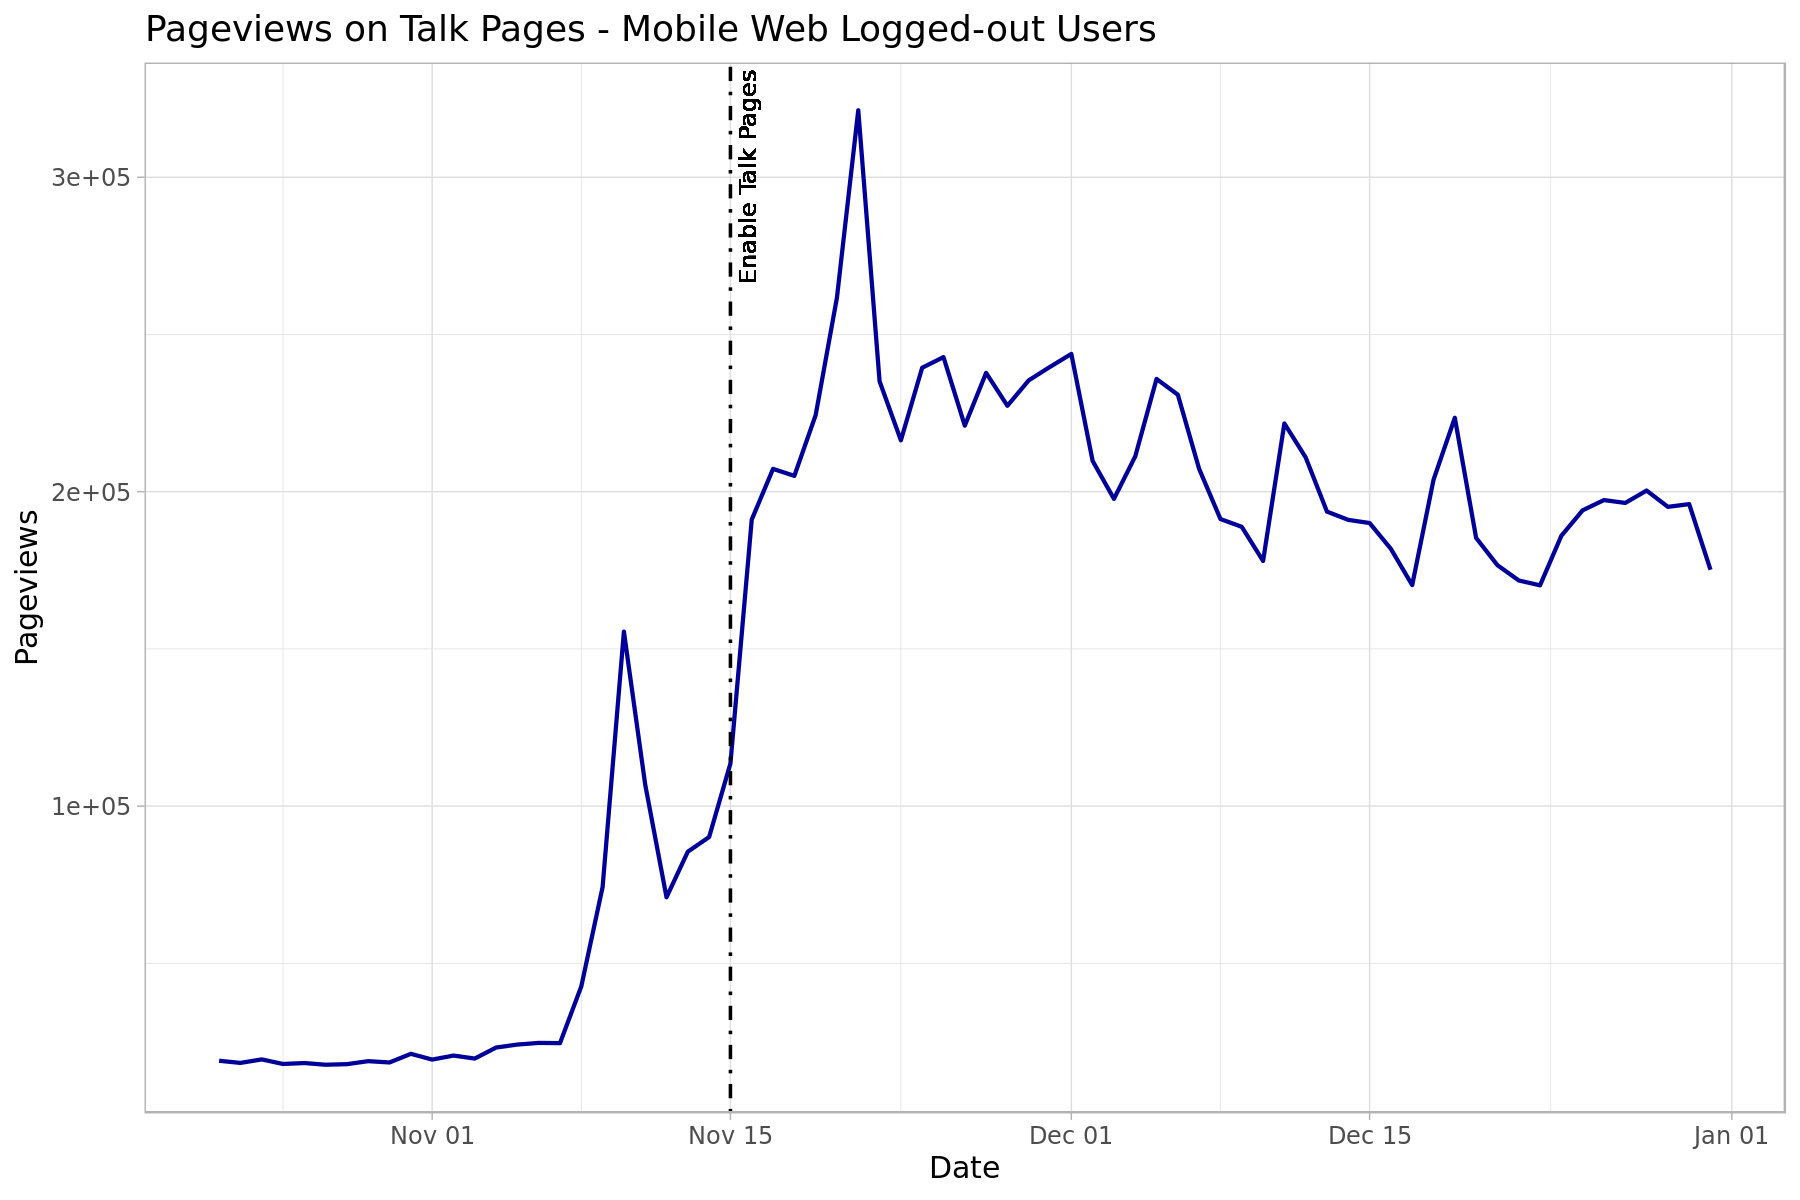

In [102]:
 g_pv3 <- ggplot(data=filter(df_pageviews_3, loggedin=='NULL' ), 
                                mapping=aes(x=date_time, y=mobileweb_pv)) +
    geom_line(size=1.2,  color="#000099") +
    geom_vline(xintercept = as.Date('2021-11-15'),  
                color = "black", linetype='dotdash', size=1) +
    geom_text(mapping = aes(x=as.Date('2021-11-15'), label="Enable Talk Pages", y=300000),
                          size = 5,
                          angle=90,
                          vjust=1.5 ) +
    labs(title = 'Pageviews on Talk Pages - Mobile Web Logged-out Users',
     x = 'Date',
     y = 'Pageviews'
    ) + 
    theme_light(base_size=18) 
g_pv3 

In [111]:
filter(df_pageviews_3, (loggedin=='NULL')& (date_time < '2021-11-15') )

date_time,loggedin,pageviews,apps_pv,desktop_pv,mobileweb_pv,mobileweb_rate
<date>,<chr>,<int>,<chr>,<int>,<int>,<dbl>
2021-10-22,NULL,176458,NULL,157457,19001,10.77
2021-10-23,NULL,138627,NULL,120312,18315,13.21
2021-10-24,NULL,152328,NULL,132899,19429,12.75
2021-10-25,NULL,175120,NULL,157141,17979,10.27
2021-10-26,NULL,183391,NULL,165115,18276,9.97
2021-10-27,NULL,181799,NULL,164067,17732,9.75
2021-10-28,NULL,192380,NULL,174461,17919,9.31
2021-10-29,NULL,194113,NULL,175242,18871,9.72
2021-10-30,NULL,160737,NULL,142278,18459,11.48


__Note:__  

- The pageviews of talk pages from mobile web logged-out users increased significantly since Nov 15, 2021.  
- The pageviews of talk pages from mobile web logged-out users has started to grow before the official enable date. It started to grow on Nov 8, 2021, and spiked between Nov 09, 2021 and Nov 11,2021 for the first time.   
- The pageviews of talk pages from mobile web logged-out users is not 0 before the official enable date. It might be due to mis-categorization of access method.  



In [112]:
filter(df_pageviews_3, (loggedin=='NULL')& (date_time >='2021-11-15') )

date_time,loggedin,pageviews,apps_pv,desktop_pv,mobileweb_pv,mobileweb_rate
<date>,<chr>,<int>,<chr>,<int>,<int>,<dbl>
2021-11-15,NULL,308861,NULL,195301,113560,36.77
2021-11-16,NULL,352426,NULL,161316,191110,54.23
2021-11-17,NULL,376695,NULL,169454,207241,55.02
2021-11-18,NULL,378689,NULL,173668,205021,54.14
2021-11-19,NULL,382011,NULL,157667,224344,58.73
2021-11-20,NULL,414762,NULL,153012,261750,63.11
2021-11-21,NULL,505535,NULL,184234,321301,63.56
2021-11-22,NULL,396819,NULL,161709,235110,59.25
2021-11-23,NULL,384246,NULL,167909,216337,56.30


- Based on the above observation, we select 2 weeks between 2021-10-24 and 2021-11-06 as the pre-deployment stage. We selected 2 weeks between 2021-11-28 and 2021-12-11 as the post-deployment stage. We estimated that the daily pageviews grew 195k. 

Average daily pageviews pre-deployment

In [114]:
mean(filter(df_pageviews_3, (loggedin=='NULL')& (date_time <='2021-11-06')& (date_time >='2021-10-24') )$mobileweb_pv)

[1] 20117.57

Average daily pageviews post-deployment

In [115]:
mean(filter(df_pageviews_3, (loggedin=='NULL')& (date_time >='2021-11-28')& (date_time <='2021-12-11') )$mobileweb_pv)

[1] 215613.1

growth

In [118]:
215613-20118

[1] 195495

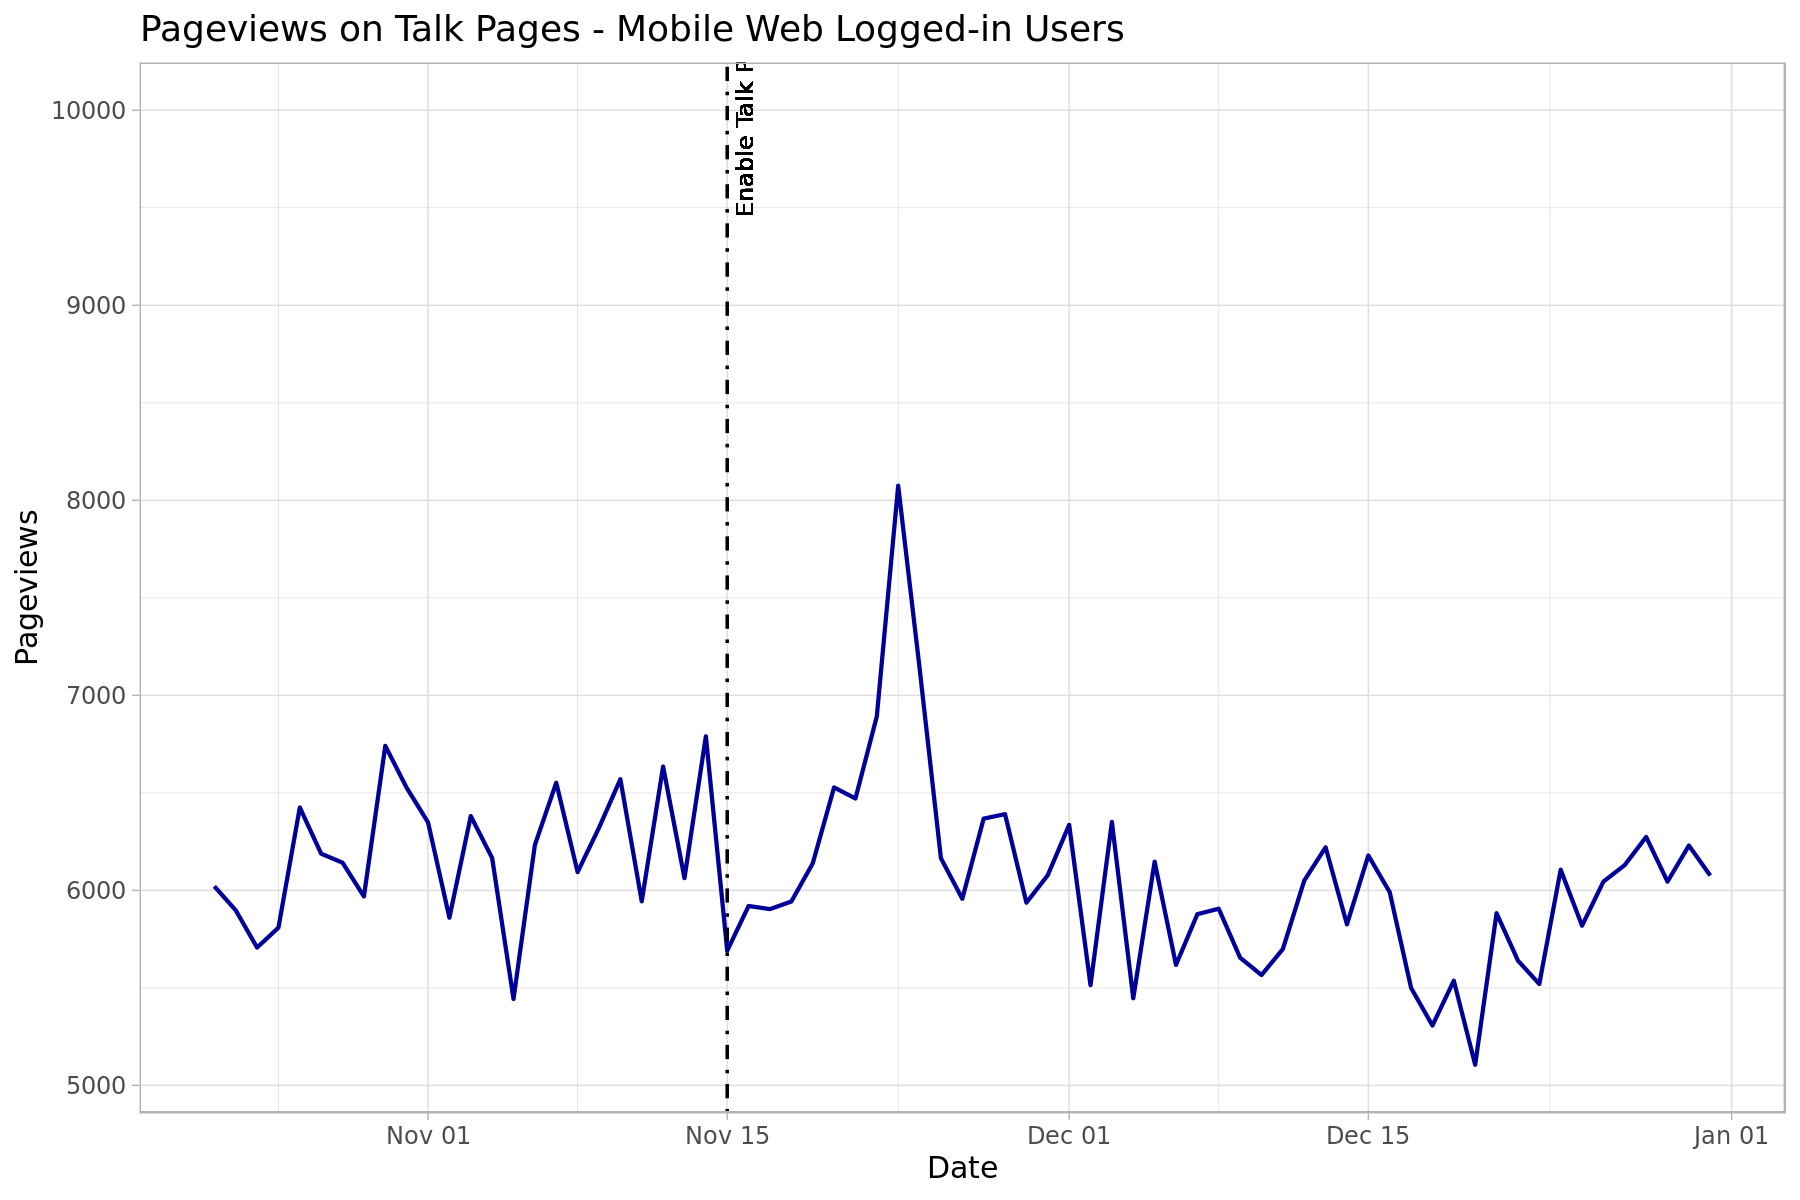

In [107]:
 g_pv3 <- ggplot(data=filter(df_pageviews_3, loggedin=='1' ), 
                                mapping=aes(x=date_time, y=mobileweb_pv)) +
    geom_line(size=1.2,  color="#000099") +
    geom_vline(xintercept = as.Date('2021-11-15'),  
                color = "black", linetype='dotdash', size=1) +
    geom_text(mapping = aes(x=as.Date('2021-11-15'), label="Enable Talk Pages", y=10000),
                          size = 5,
                          angle=90,
                          vjust=1.5 ) +
    labs(title = 'Pageviews on Talk Pages - Mobile Web Logged-in Users',
     x = 'Date',
     y = 'Pageviews'
    ) + 
    theme_light(base_size=18) 
g_pv3 

In [108]:
df_pageviews_3 <- df_pageviews_3 %>%
    mutate(mobileweb_rate = round(mobileweb_pv/pageviews*100,2))



In [109]:
df_pageviews_3

date_time,loggedin,pageviews,apps_pv,desktop_pv,mobileweb_pv,mobileweb_rate
<date>,<chr>,<int>,<chr>,<int>,<int>,<dbl>
2021-10-22,NULL,176458,NULL,157457,19001,10.77
2021-10-22,1,73416,NULL,67395,6021,8.20
2021-10-23,NULL,138627,NULL,120312,18315,13.21
2021-10-23,1,66093,NULL,60195,5898,8.92
2021-10-24,NULL,152328,NULL,132899,19429,12.75
2021-10-24,1,66508,NULL,60801,5707,8.58
2021-10-25,NULL,175120,NULL,157141,17979,10.27
2021-10-25,1,78308,NULL,72499,5809,7.42
2021-10-26,NULL,183391,NULL,165115,18276,9.97


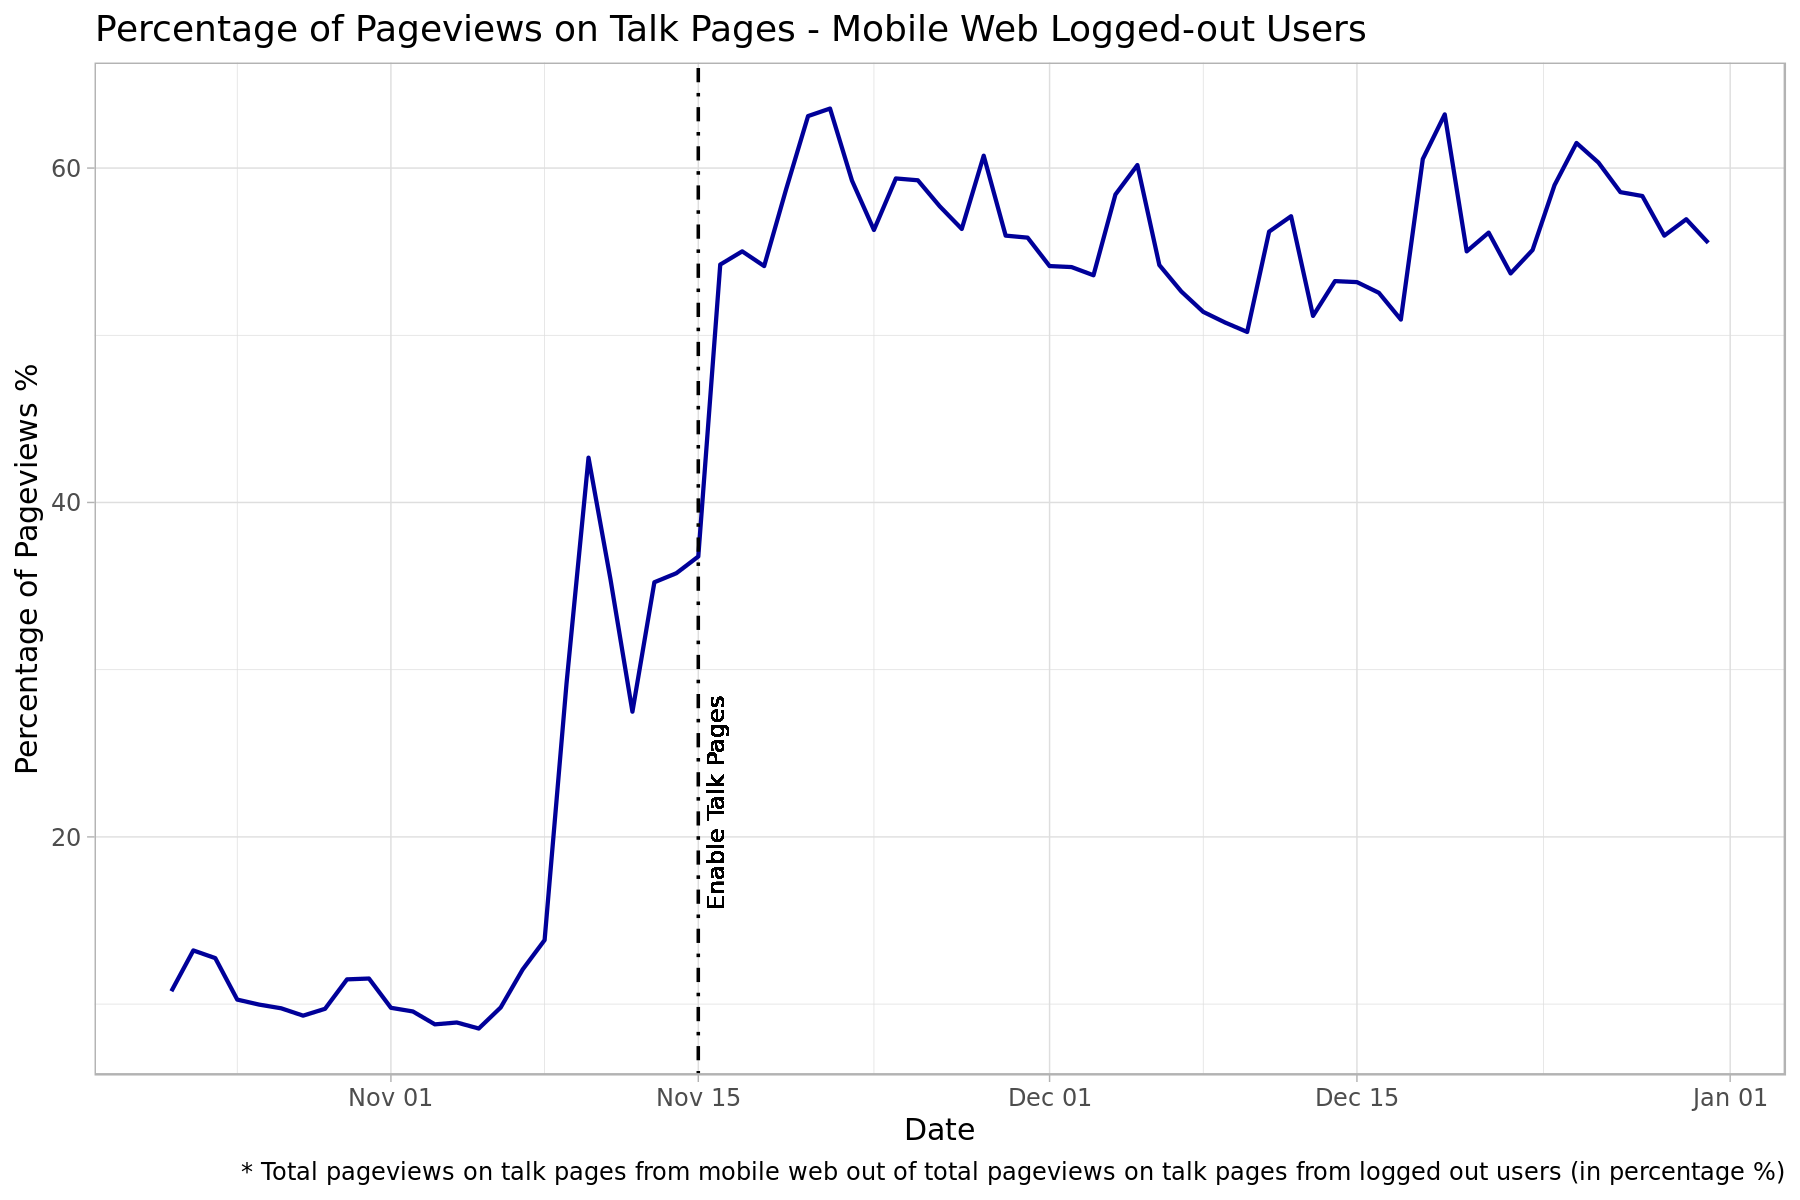

In [110]:
g_pv_rate_3 <- ggplot(data=filter(df_pageviews_3, loggedin=='NULL' ) , 
                                mapping=aes(x=date_time, y=mobileweb_rate)) +
    geom_line(size=1.2,  color="#000099") +
    geom_vline(xintercept = as.Date('2021-11-15'),  
                color = "black", linetype='dotdash', size=1) +
    geom_text(mapping = aes(x=as.Date('2021-11-15'), label="Enable Talk Pages", y=22),
                          size = 5,
                          angle=90,
                          vjust=1.5 ) +
    labs(title = 'Percentage of Pageviews on Talk Pages - Mobile Web Logged-out Users',
     x = 'Date',
     y = 'Percentage of Pageviews %',
    caption = "* Total pageviews on talk pages from mobile web out of total pageviews on talk pages from logged out users (in percentage %)" 
    ) + 
    theme_light(base_size=18) 
g_pv_rate_3 